In [9]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set()

In [10]:
# load data
def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

def preprocess_data(df):
    df['sun_rounded'] = df[['sun zenith']].apply(lambda row: round(row['sun zenith']), axis='columns')
    num_regions =4
    for i in range(num_regions):
        df[f'region_{i}']=df[['regions']].apply(lambda row: row['regions'][i], axis='columns')
    df.drop(['sun zenith', 'regions'],axis='columns', inplace=True)
    df['year_month'] = df['utc time'].map(lambda x: str(x.strftime('%Y-%m')))
    return df

sun_data_full = load_data("../vadim/sun_data_2years.pkl")
sun_data_clean_full  = preprocess_data(sun_data_full)
sun_data_clean_full

,utc time,sun_rounded,region_0,region_1,region_2,region_3,year_month
0,2020-01-01 07:14:00+00:00,66.0,False,False,False,True,2020-01
1,2020-01-01 12:02:00+00:00,30.0,False,False,True,False,2020-01
2,2020-01-01 12:03:00+00:00,27.0,False,False,True,False,2020-01
3,2020-01-01 12:04:00+00:00,23.0,False,False,True,False,2020-01
4,2020-01-01 12:05:00+00:00,20.0,False,False,True,False,2020-01
...,...,...,...,...,...,...,...
48717,2021-12-30 20:27:00+00:00,8.0,True,False,False,False,2021-12
48718,2021-12-30 20:28:00+00:00,10.0,True,False,False,False,2021-12
48719,2021-12-30 20:29:00+00:00,14.0,True,False,False,False,2021-12
48720,2021-12-30 22:01:00+00:00,11.0,True,False,False,False,2021-12


In [3]:
sun_data_clean_full.describe()

,sun_rounded
count,48722.000000
mean,41.109396
std,17.265587
min,0.000000
25%,28.000000
50%,42.000000
75%,56.000000
max,70.000000


# Counts

In [4]:
cols = sun_data_clean_full.select_dtypes(include=['bool', 'object']).columns
for col in cols:
    print(sun_data_clean_full.groupby(by=col).size(),'\n')


region_0
False    20919
True     27803
dtype: int64 

region_1
False    41748
True      6974
dtype: int64 

region_2
False    33758
True     14964
dtype: int64 

region_3
False    48136
True       586
dtype: int64 

year_month
2020-01    2549
2020-02    1698
2020-03    2436
2020-04    1615
2020-05    2236
2020-06    1484
2020-07    2218
2020-08    1662
2020-09    2314
2020-10    1848
2020-11    2449
2020-12    1947
2021-01    2549
2021-02    1633
2021-03    2444
2021-04    1629
2021-05    2230
2021-06    1490
2021-07    2197
2021-08    1666
2021-09    2307
2021-10    1841
2021-11    2440
2021-12    1840
dtype: int64 



In [5]:
def plot_all_time_all_regions(df,bins=10):
    fig,axs = plt.subplots(1,1,figsize=(14,12))
    df[["sun_rounded"]].hist(ax=axs,bins=bins)
    axs.set_title('Full Time Range, all regions, Sun Zenith Histogram')

    
def plot_all_time_per_region__2by2(df, do_distplot=True):
    
    fig, axs = plt.subplots(2,2, figsize=(16,14))
    region_id = 0
    fig.suptitle('Full Time Range, per Region, Sun Zenith Histogram', y=0.95)
    for i in range(2):
        for j in range(2):
            
            input_data = df[["sun_rounded"]].where(df[f'region_{region_id}']==True)
            
            if do_distplot:
                sns.distplot(input_data,ax=axs[i][j])
            else:
                input_data.hist(ax=axs[i][j])
                
            axs[i][j].set_title(f'Region {region_id}')
            region_id +=1

def plot_all_time_per_region__1by1(df, do_distplot=True):
    
    fig, axs = plt.subplots(1,1, figsize=(16,14))
    region_id = 0
    fig.suptitle('Full Time Range, per Region, Sun Zenith Histogram', y=0.9)
    
    for i in range(2):
        for j in range(2):
            
            input_data = df[["sun_rounded"]].where(df[f'region_{region_id}']==True)
            if do_distplot:
                sns.distplot(input_data,ax=axs, kde_kws={"label": f'Region {region_id}'})
            else:
                input_data.hist(ax=axs, alpha=0.5)
            region_id +=1


# Full Time Range, all regions, Sun Zenith Histogram

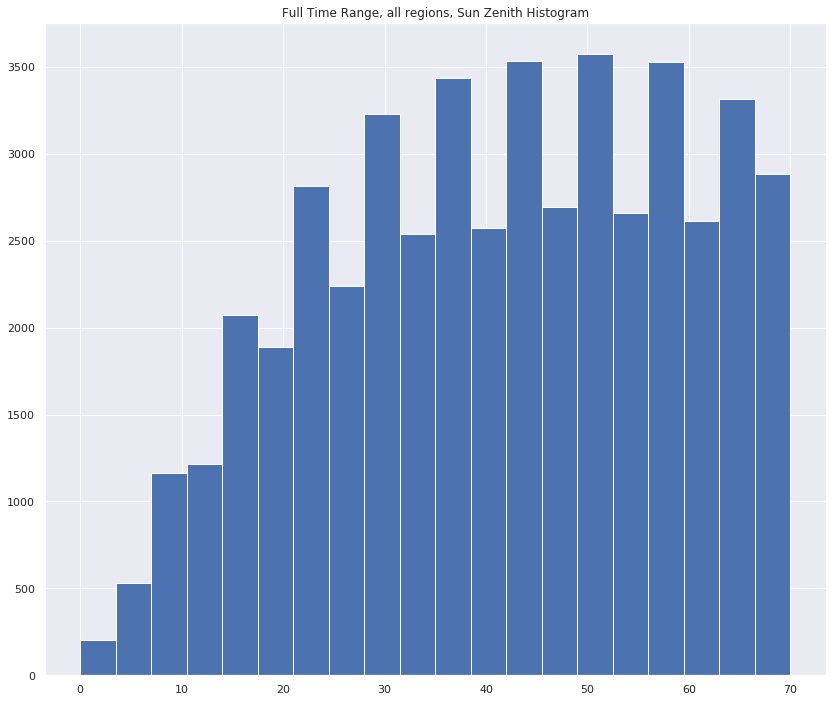

In [6]:
plot_all_time_all_regions(sun_data_clean_full,bins=20)

# Full Time Range, per Region, Sun Zenith Histogram

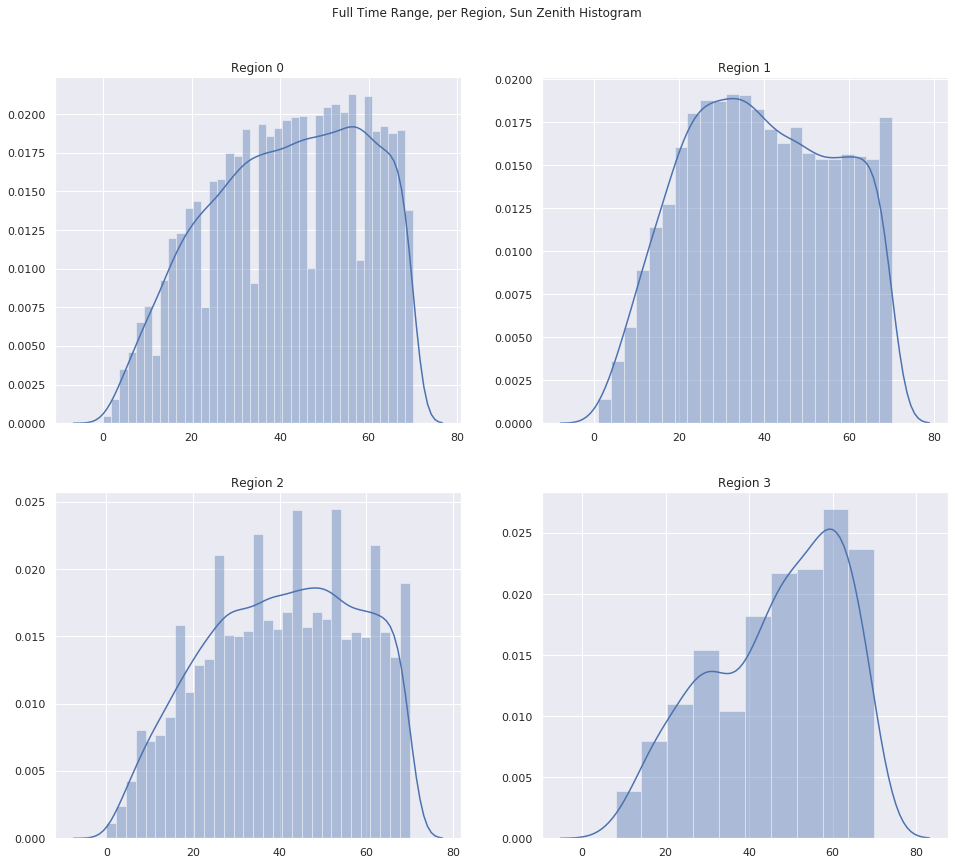

In [7]:
plot_all_time_per_region__2by2(sun_data_clean_full)

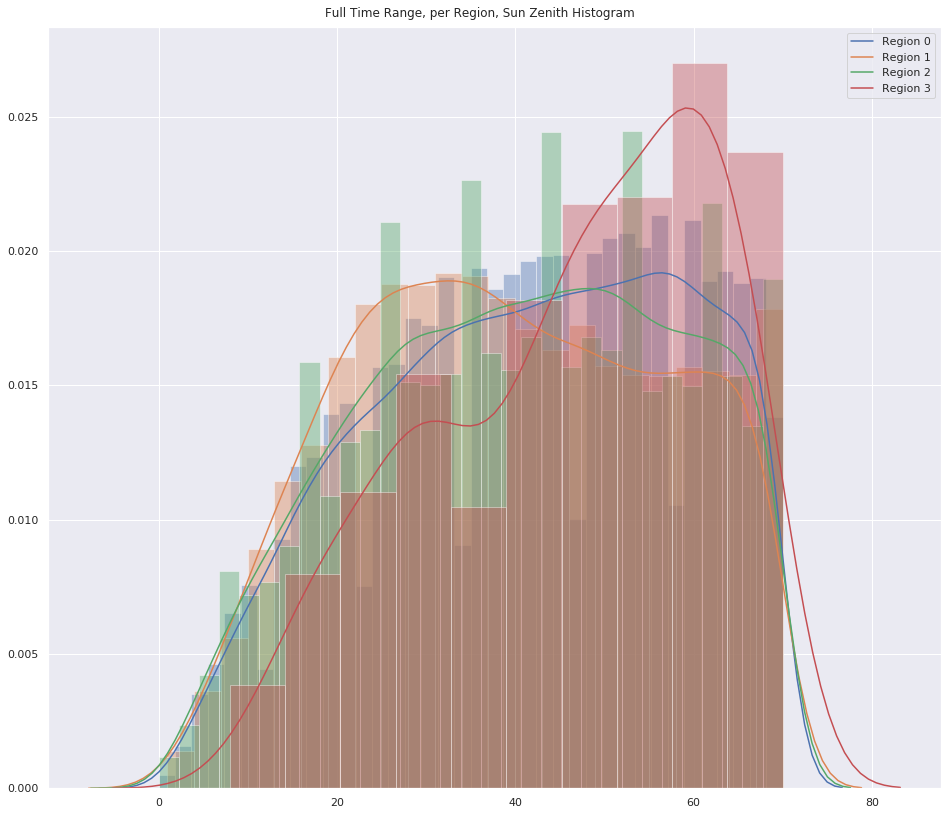

In [17]:
plot_all_time_per_region__1by1(sun_data_clean_full)

# Sun Zenith Histogram - per year-month, per Region

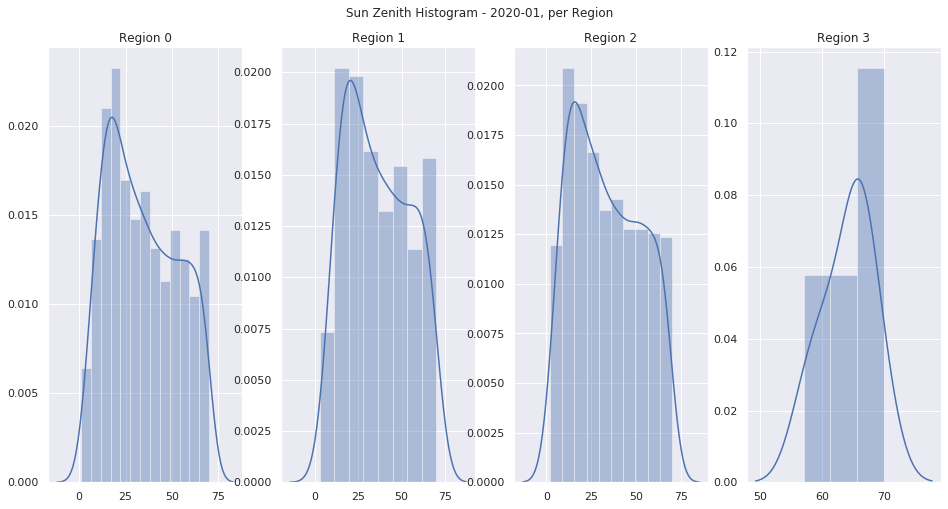

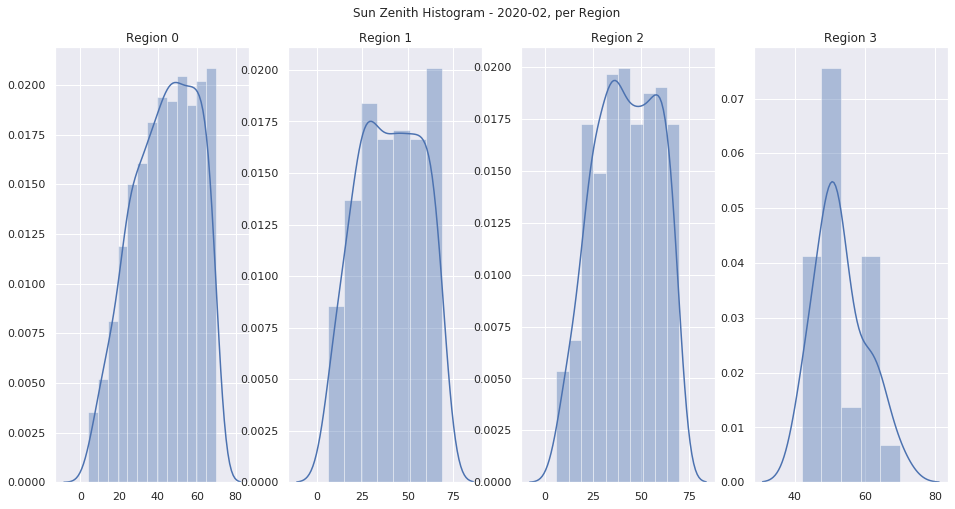

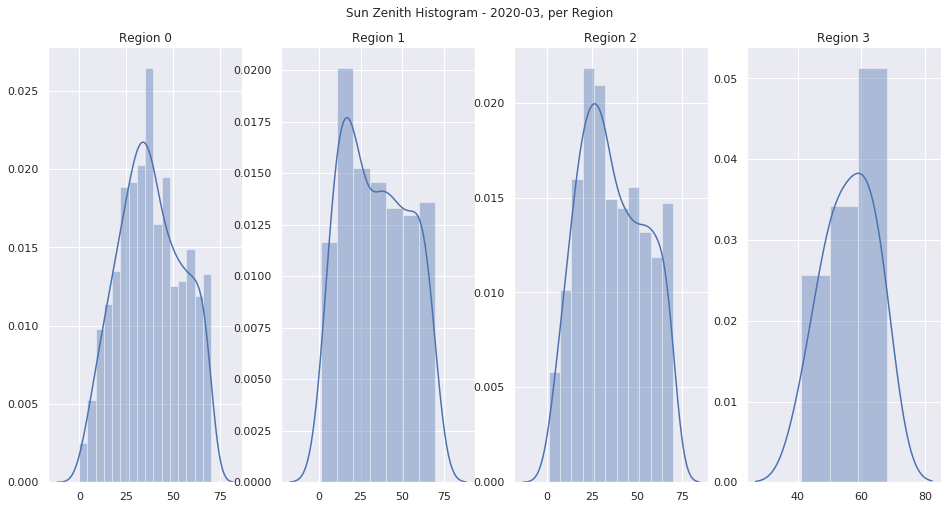

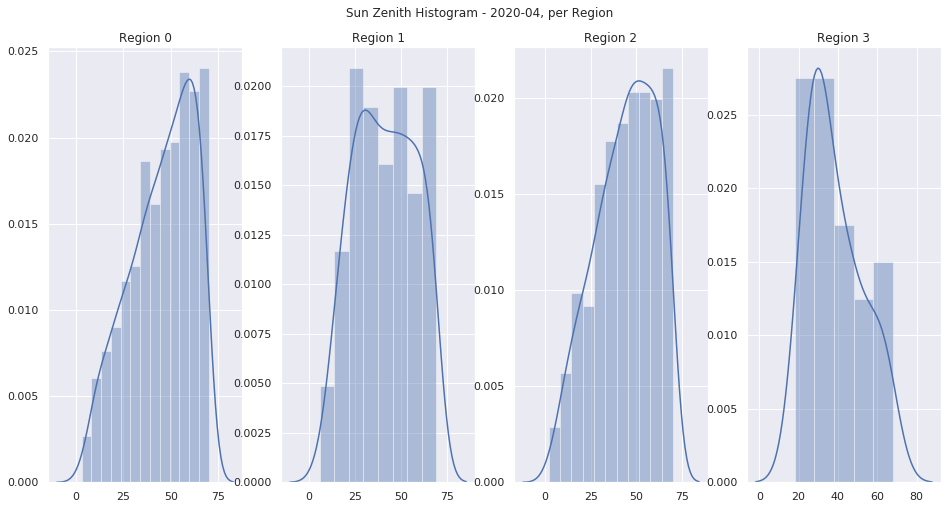

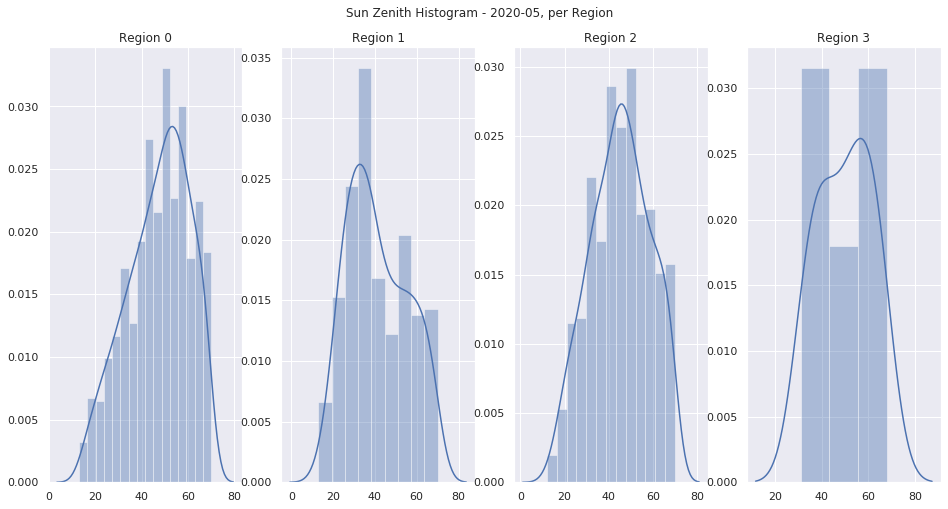

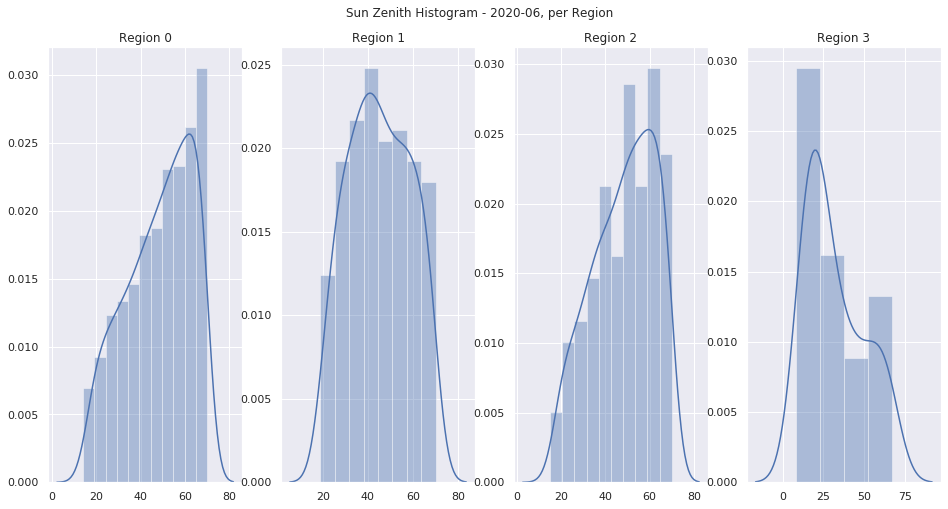

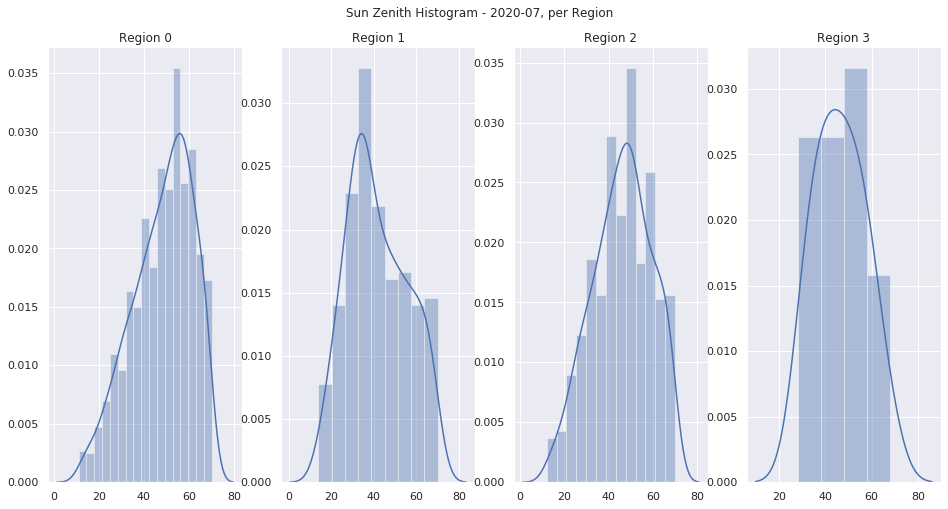

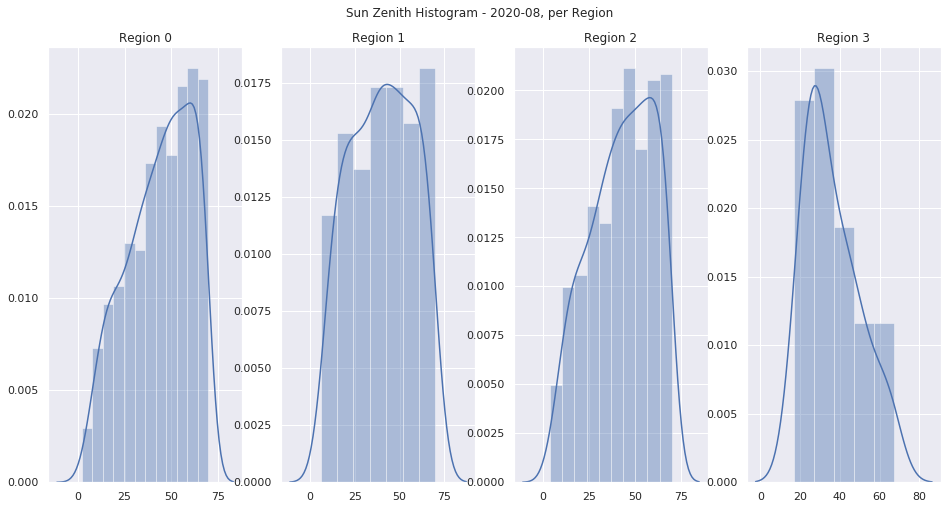

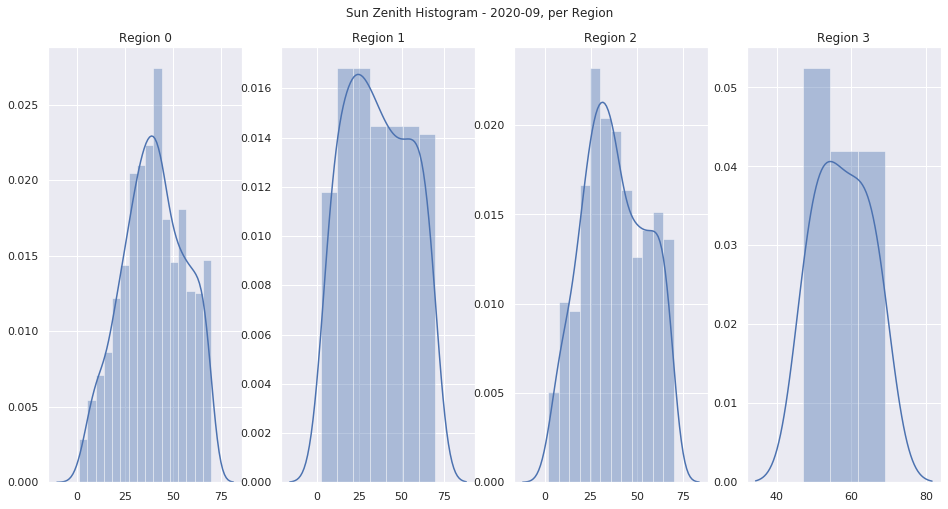

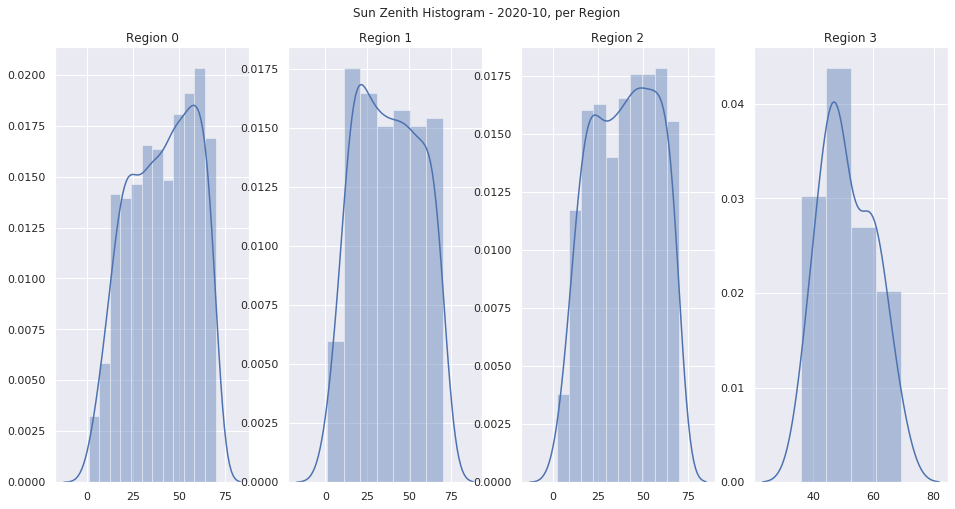

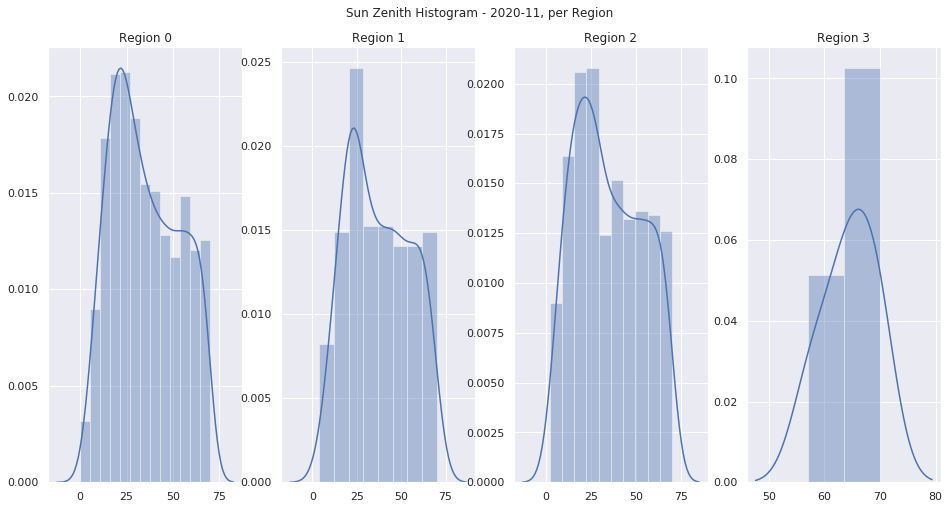

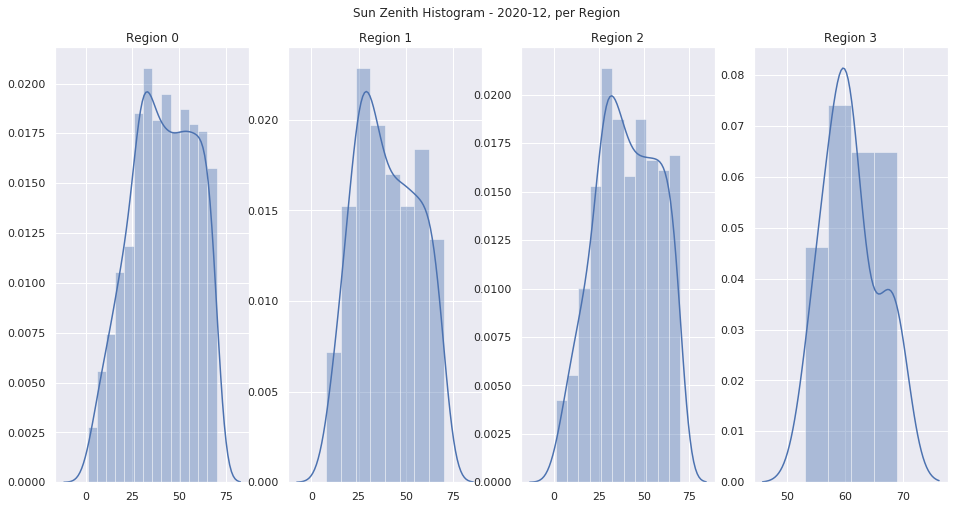

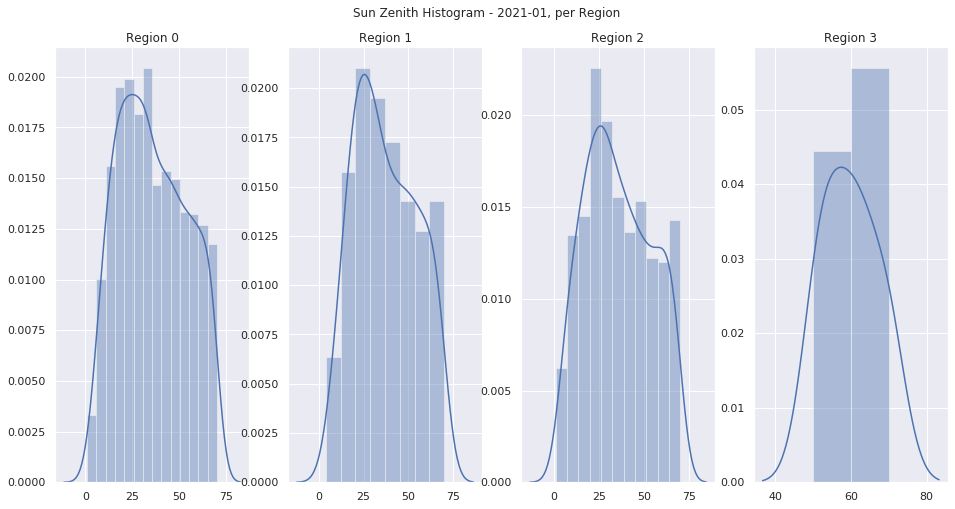

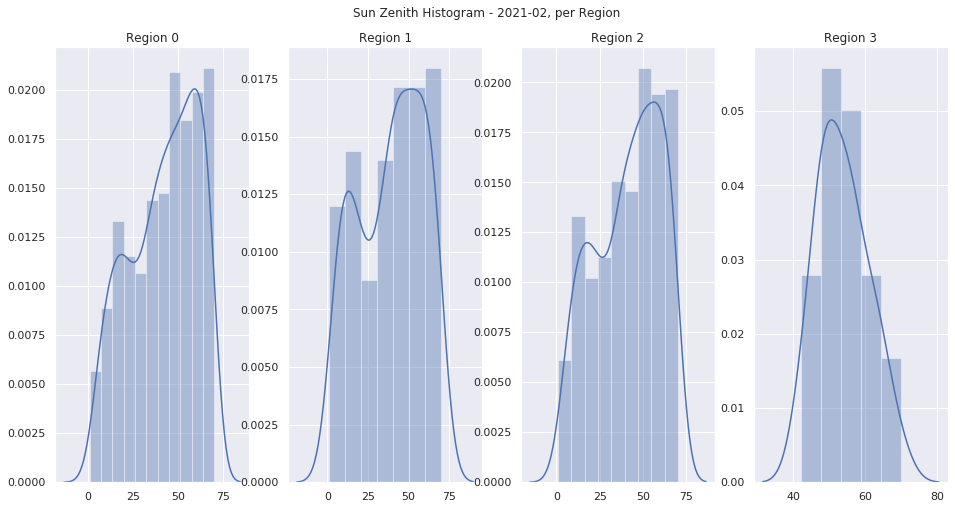

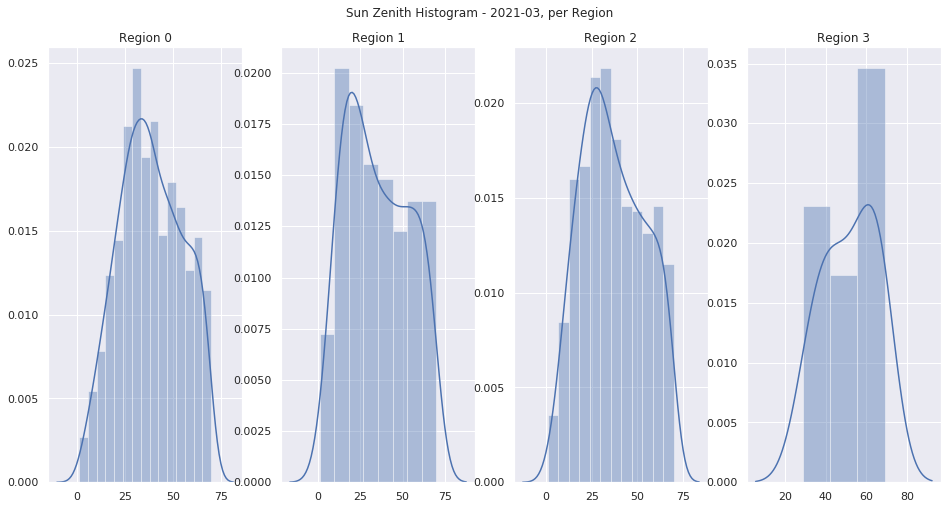

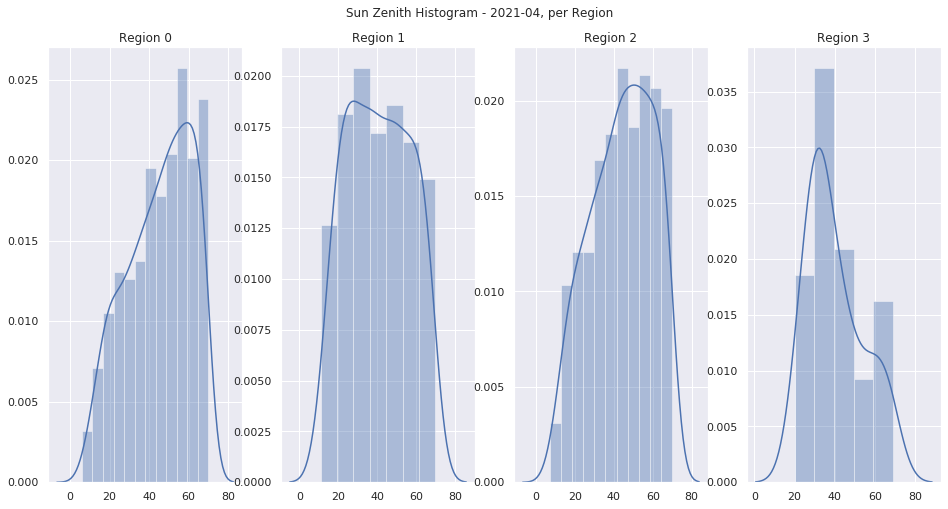

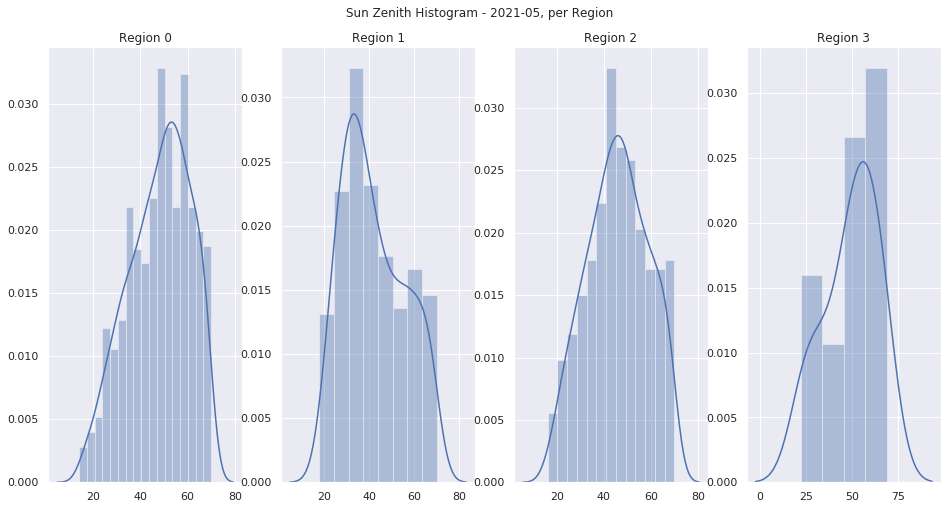

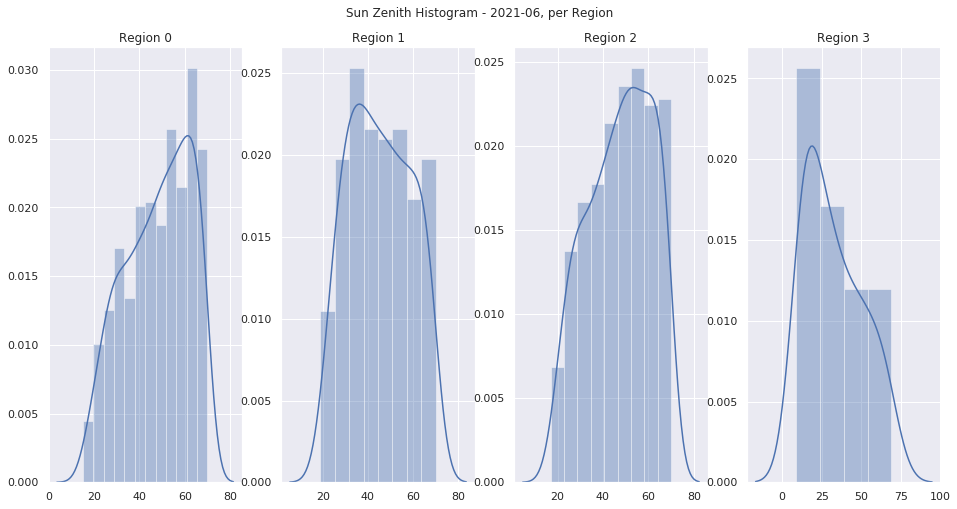

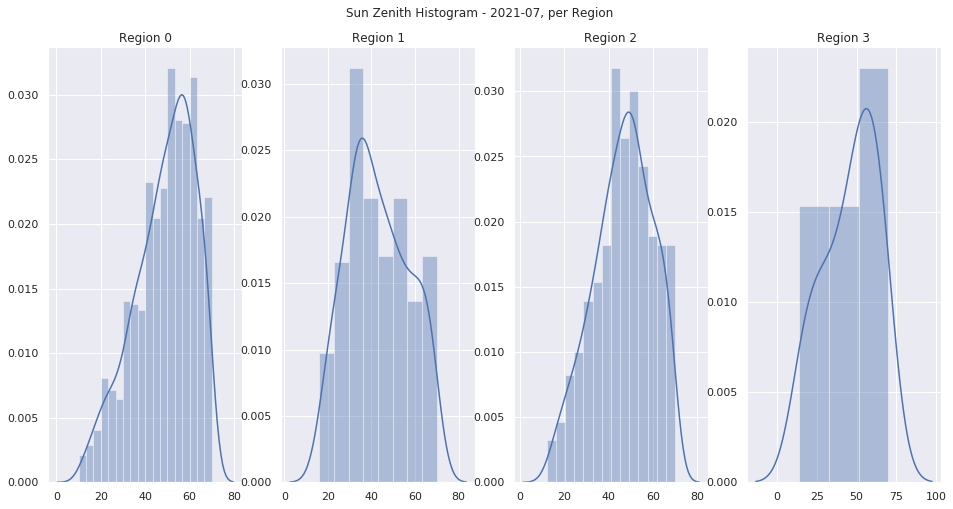

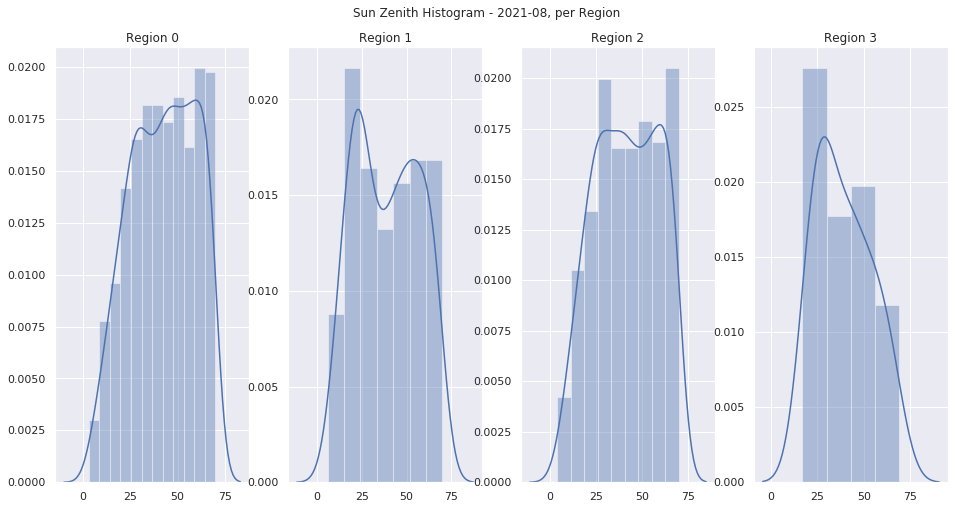

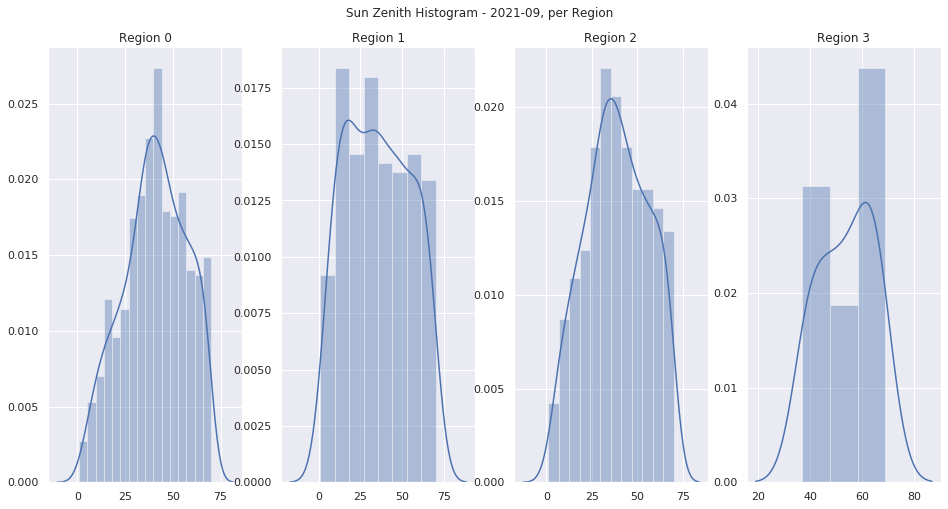

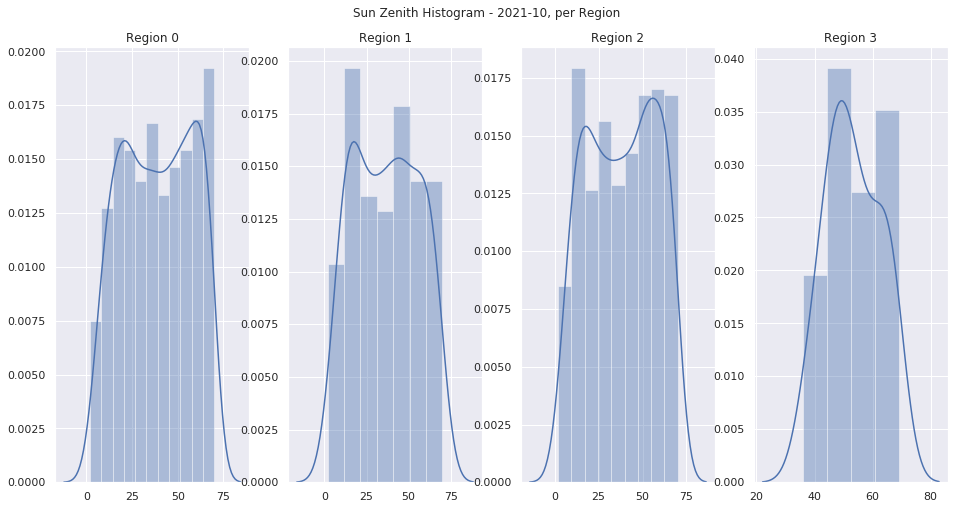

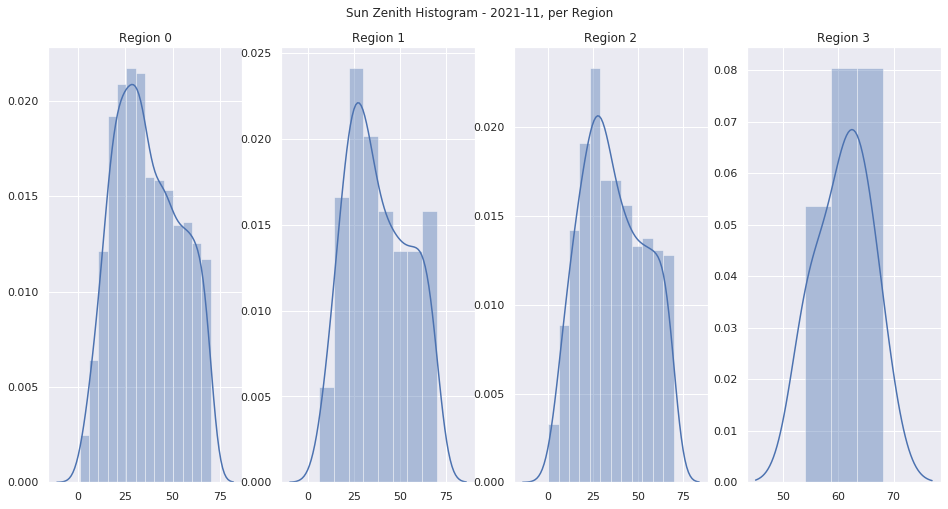

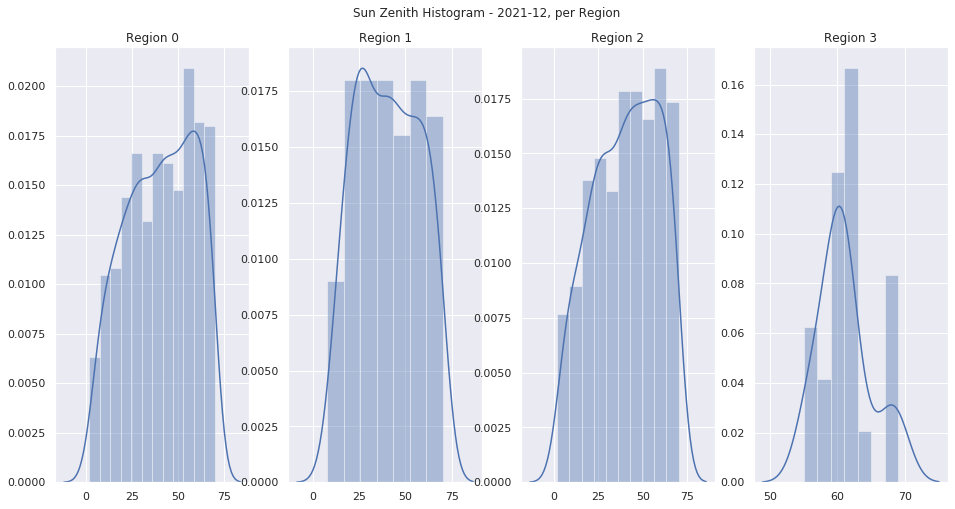

In [16]:
def plot_per_time_per_region__1by4(df, year_month, do_distplot=True):
    
    fig, axs = plt.subplots(1,4, figsize=(16,8))
    fig.suptitle(f'Sun Zenith Histogram - {year_month}, per Region', y=0.95)
    for region_id in range(4):            
            input_data = df[["sun_rounded"]][(df['year_month']==year_month)&(df[f'region_{region_id}']==True)]
            if do_distplot:
                sns.distplot(input_data,ax=axs[region_id])
            else:
                input_data.hist(ax=axs[region_id])
                
            axs[region_id].set_title(f'Region {region_id}')
            
year_months = sun_data_clean_full['year_month'].unique()

for year_month in year_months:
    plot_per_time_per_region__1by4(sun_data_clean_full, year_month=year_month)

# Sun Zenith Histogram - per year-month, all Regions

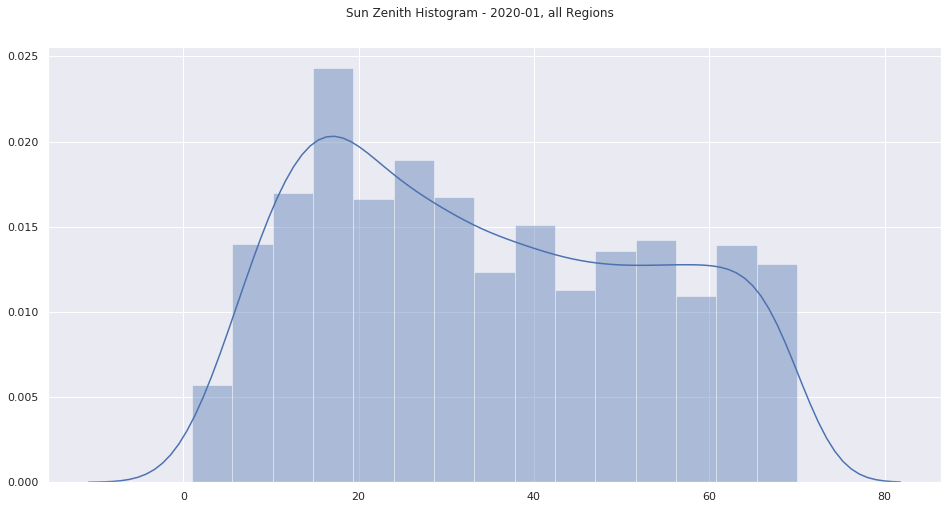

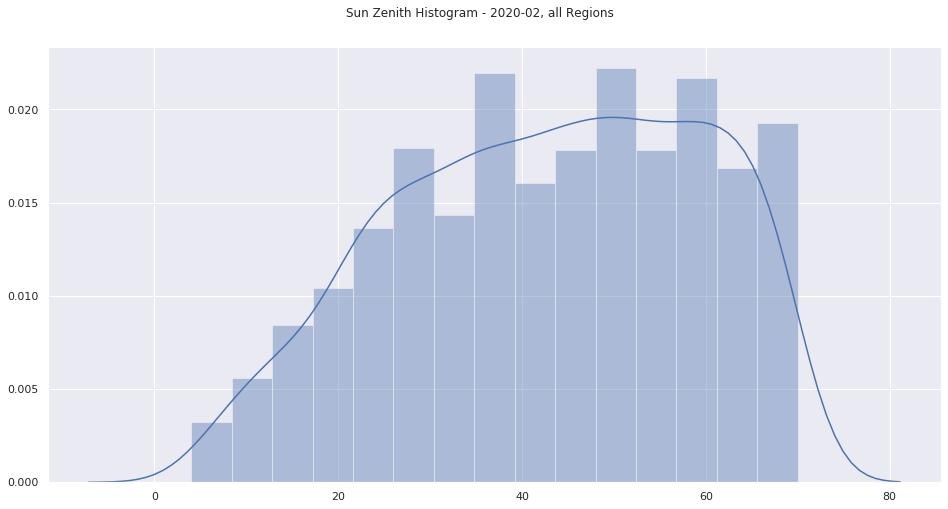

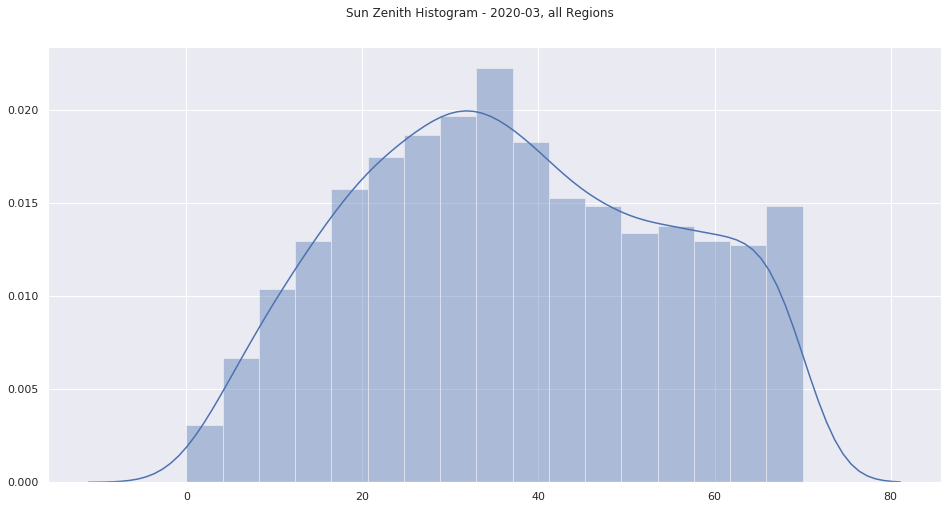

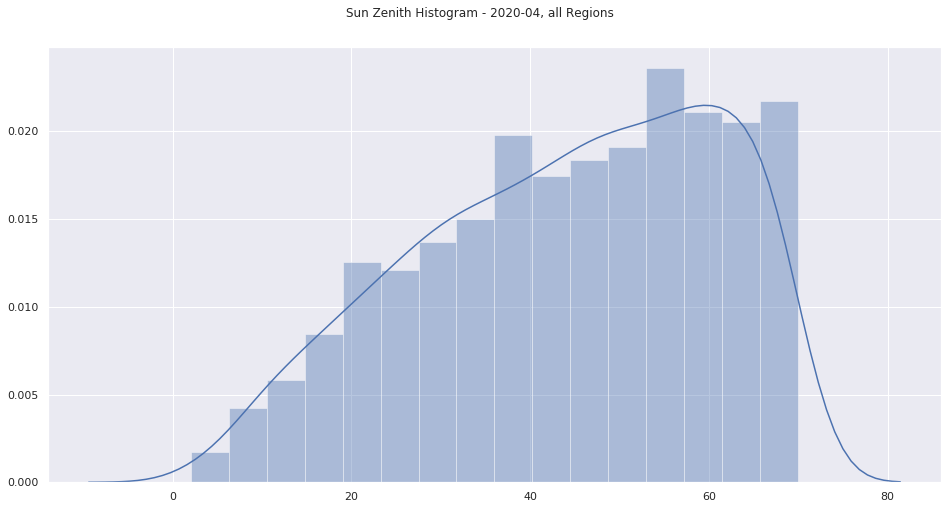

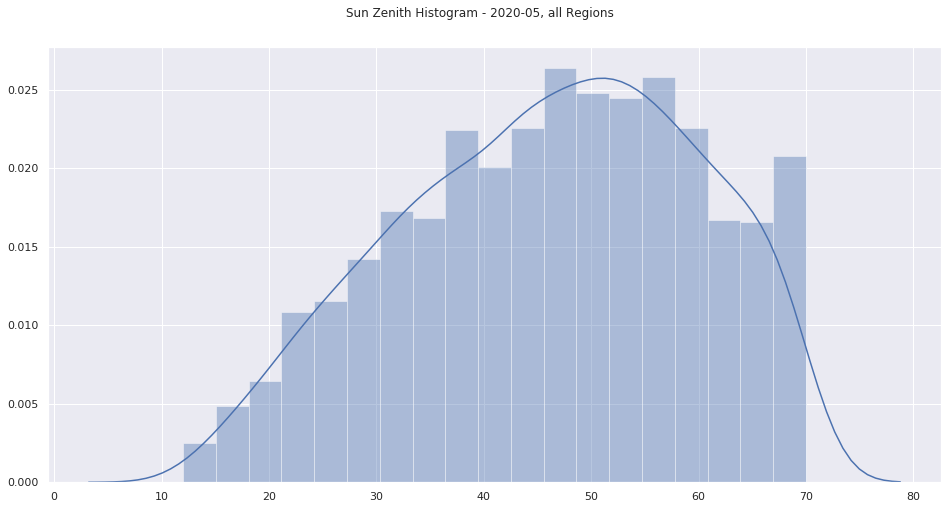

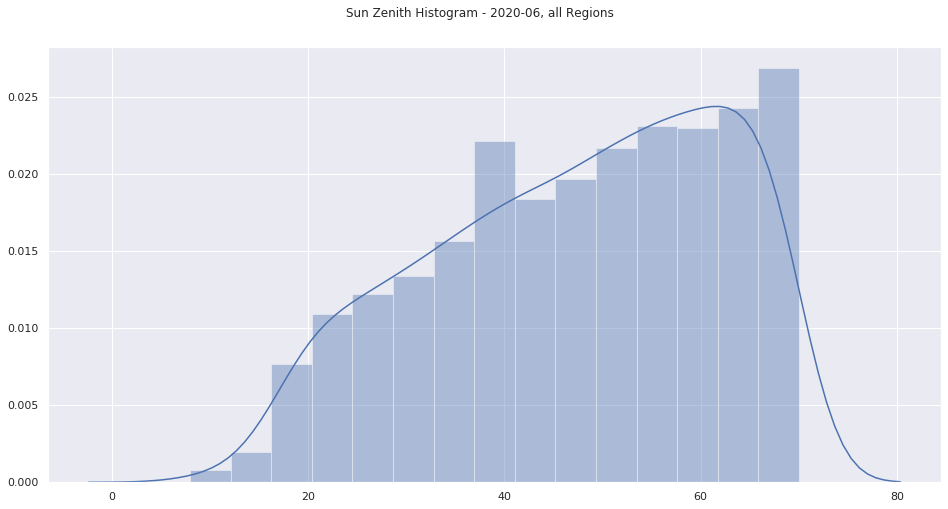

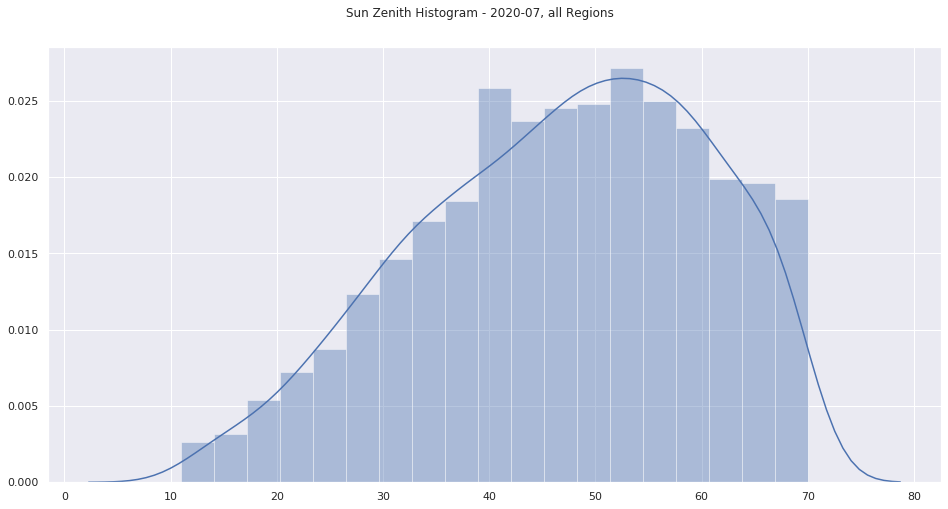

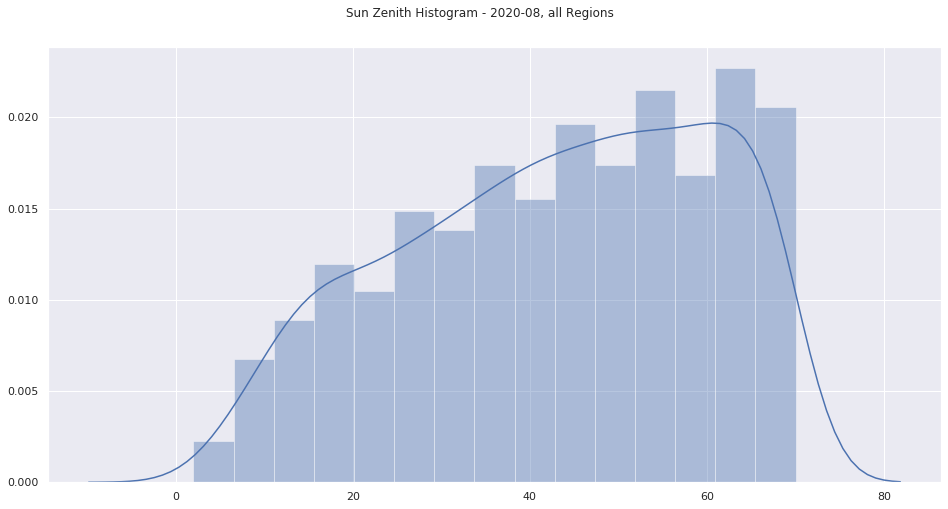

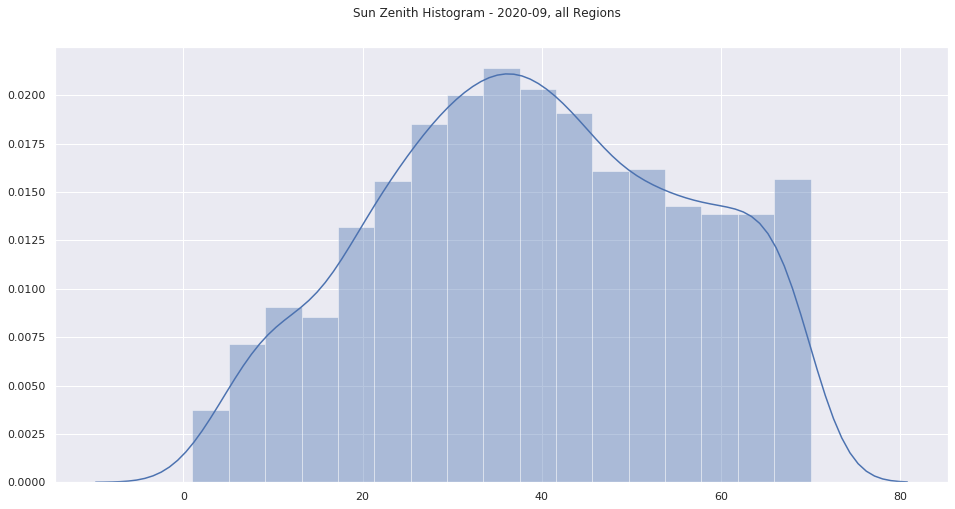

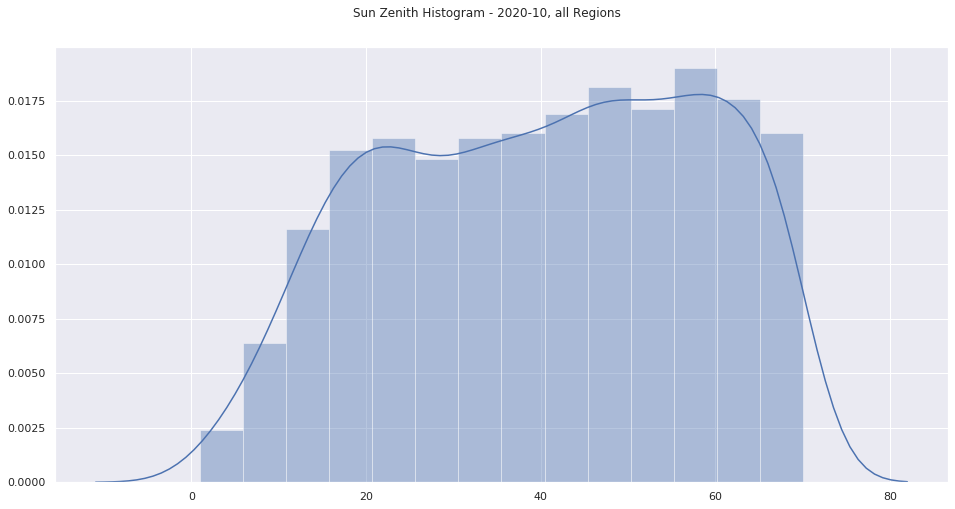

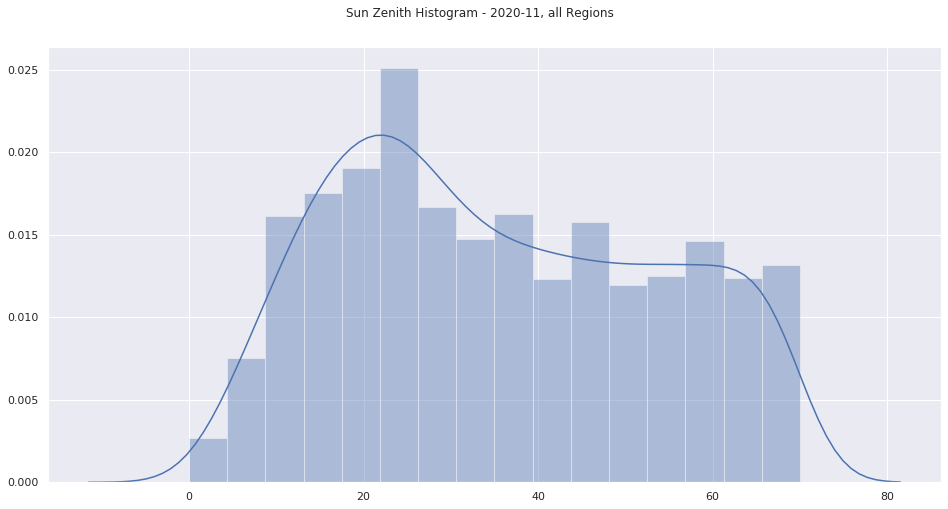

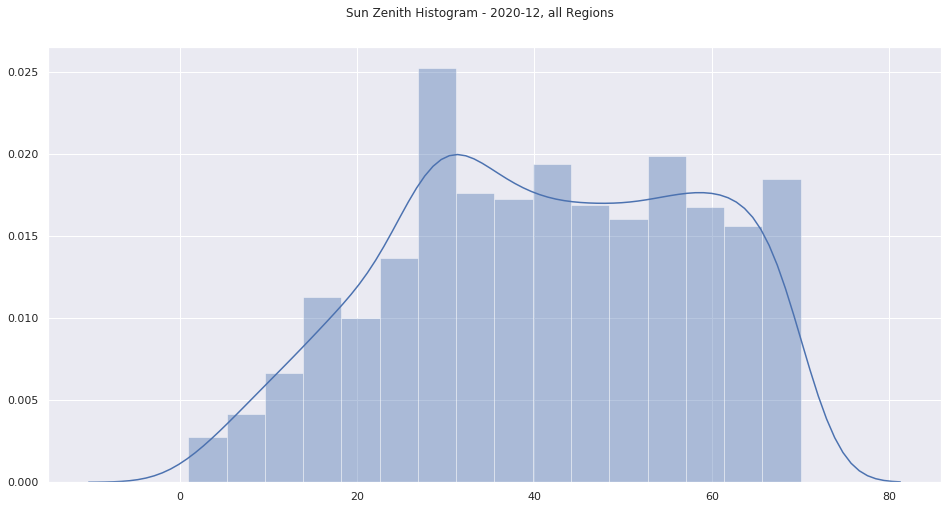

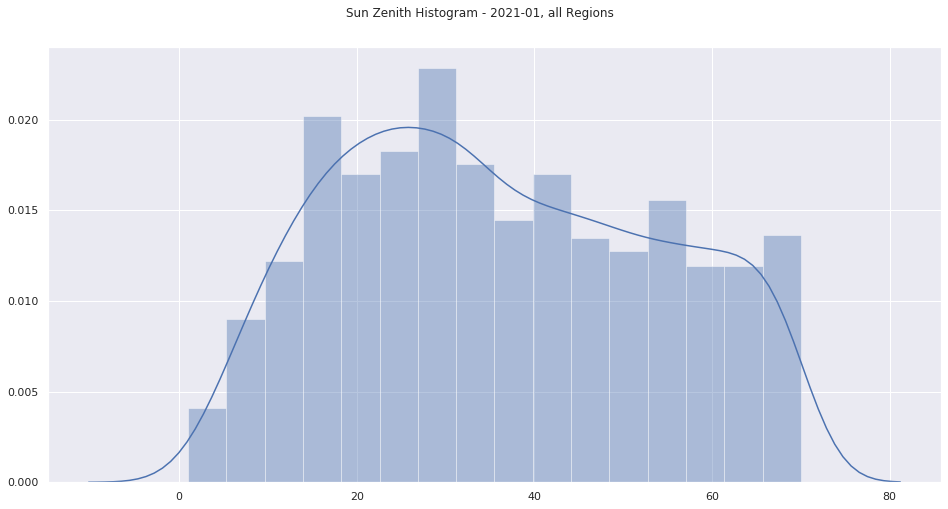

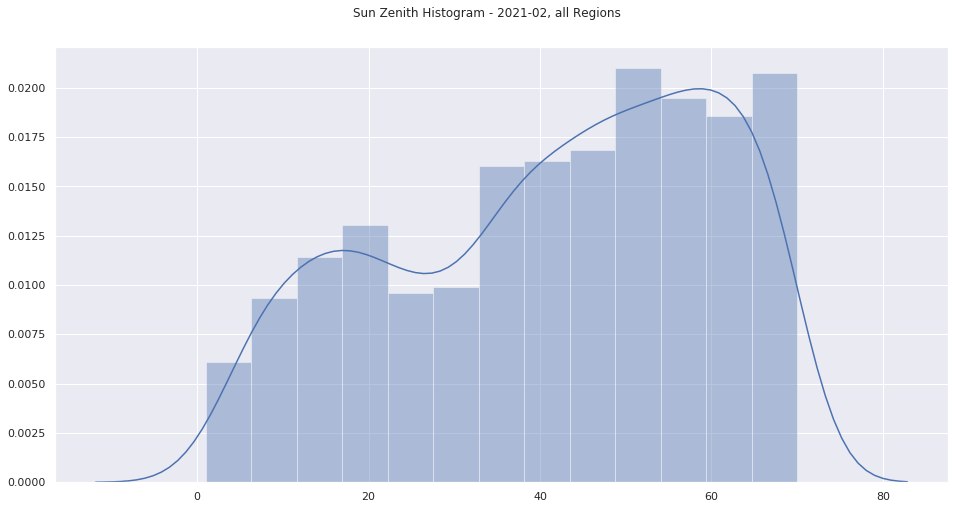

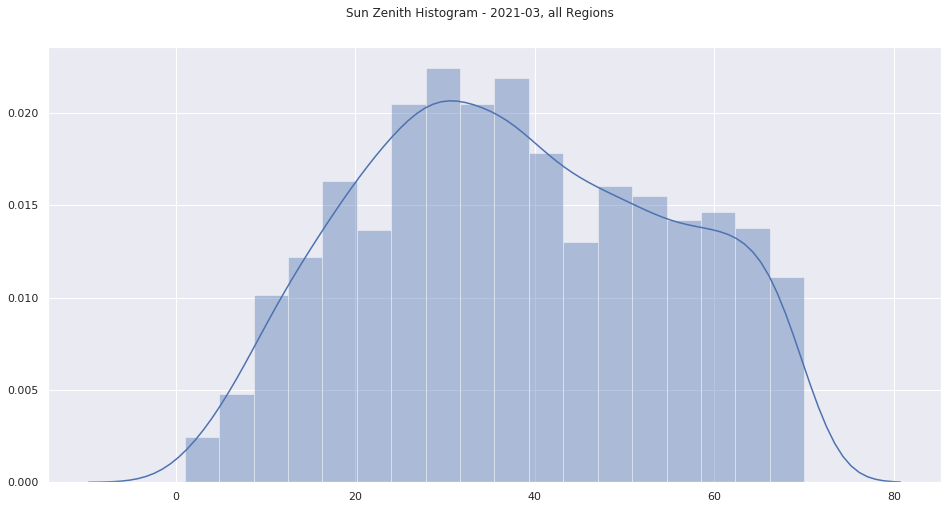

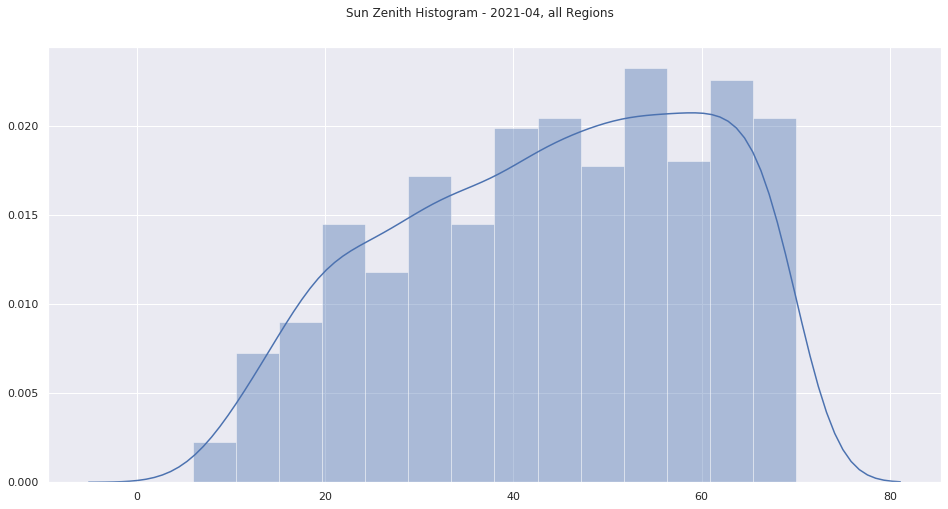

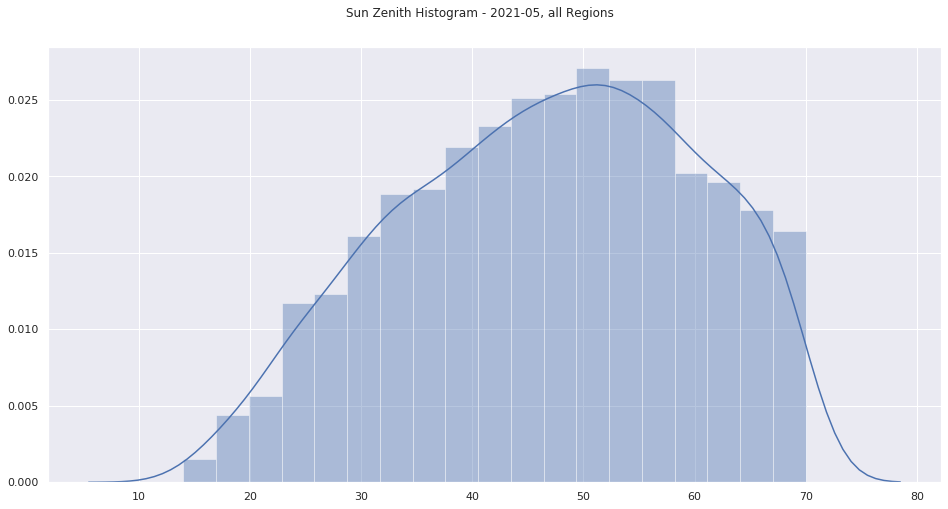

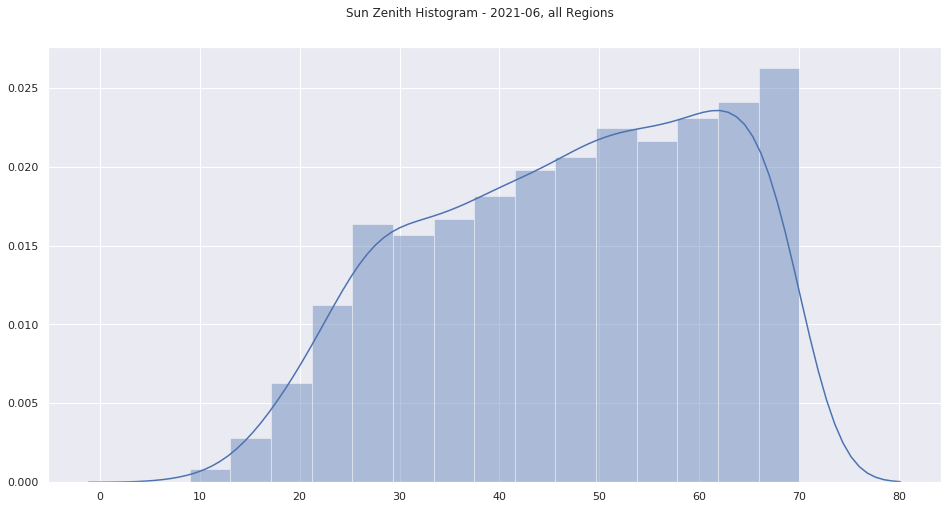

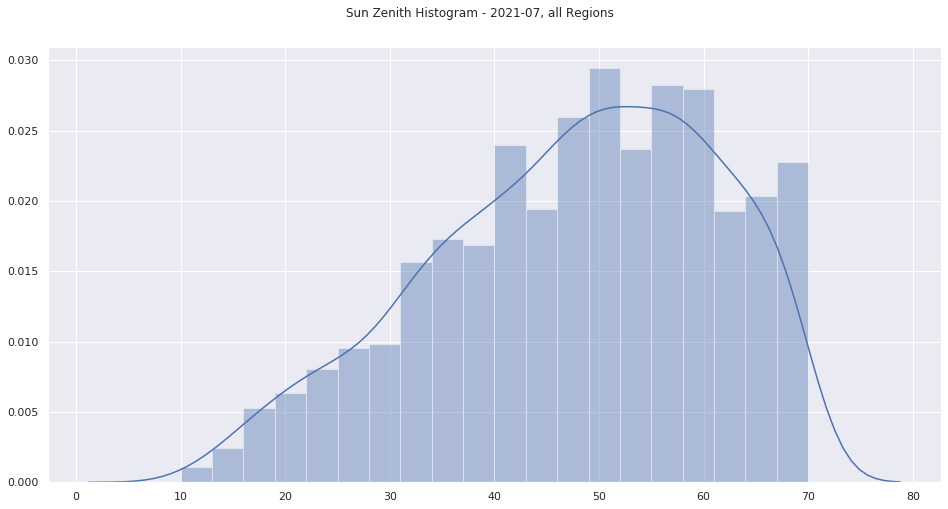

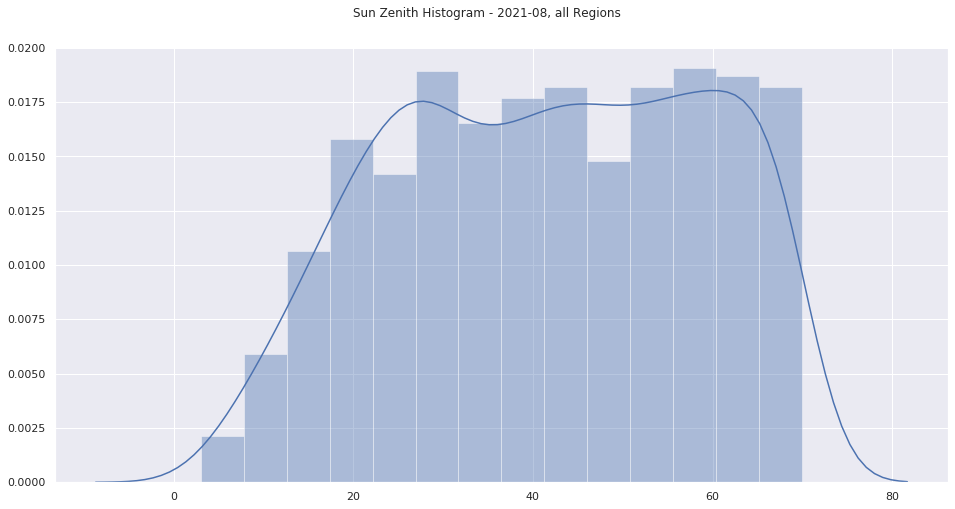

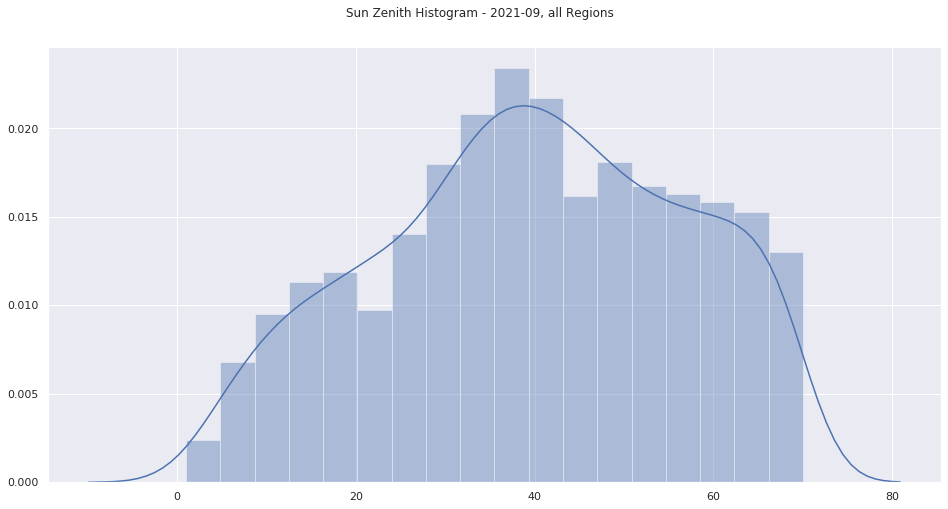

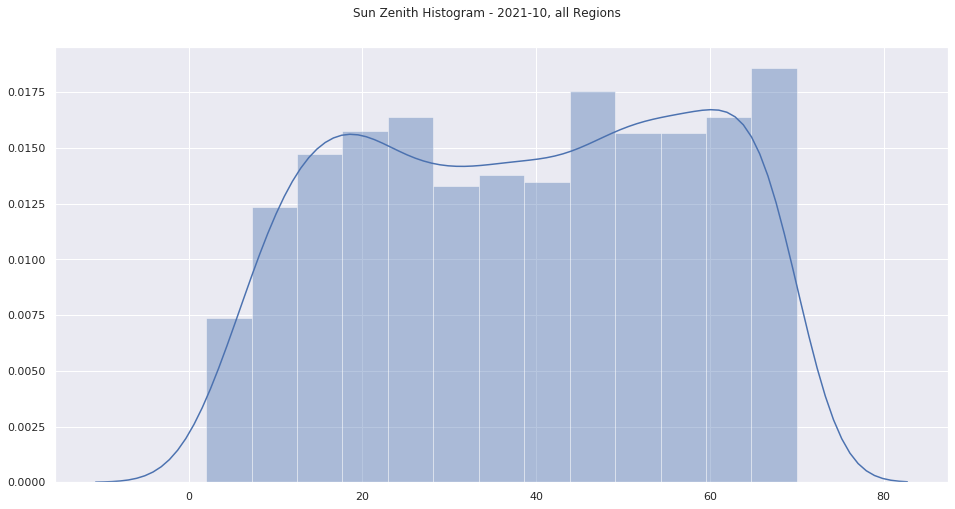

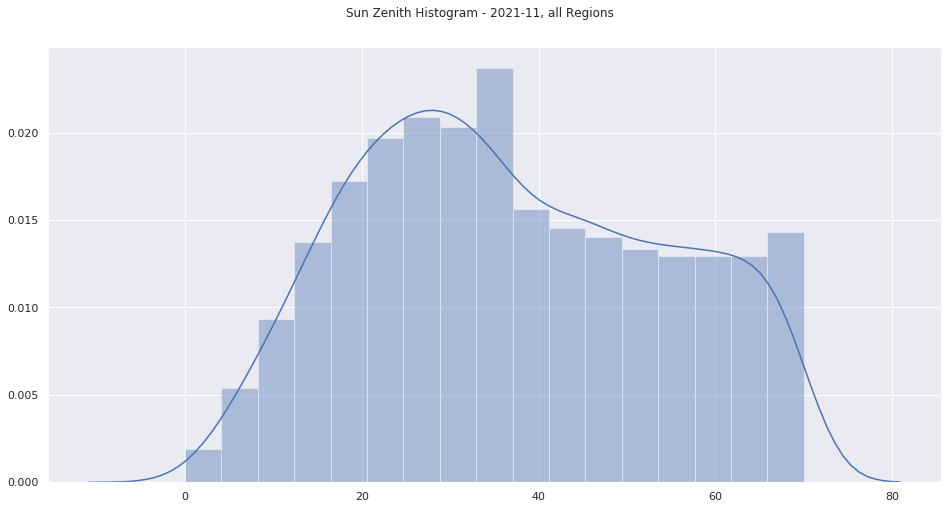

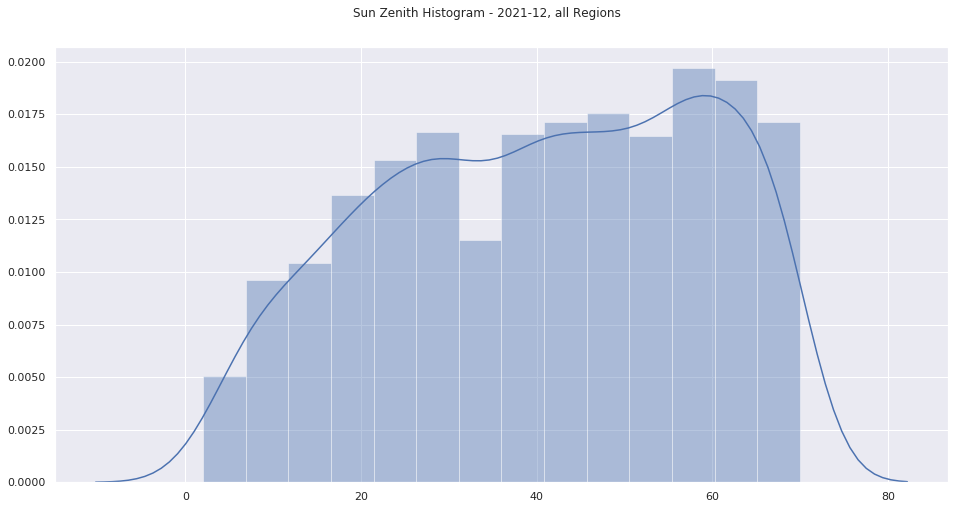

In [12]:
def plot_per_time_all_regions__1by4(df, year_month, do_distplot=True):
    
    fig, axs = plt.subplots(1,1, figsize=(16,8))
    fig.suptitle(f'Sun Zenith Histogram - {year_month}, all Regions', y=0.95)
    input_data = df[["sun_rounded"]][(df['year_month']==year_month)]
    if do_distplot:
        sns.distplot(input_data,ax=axs)
    else:
        input_data.hist(ax=axs[region_id])

year_months = sun_data_clean_full['year_month'].unique()

for year_month in year_months:
    plot_per_time_all_regions__1by4(sun_data_clean_full, year_month=year_month)

In [11]:
with open('../vadim/vis_radiances.npy', 'rb') as f:
    vis = np.load(f)
    
with open('../vadim/swir_radiances.npy', 'rb') as f:
    swir = np.load(f)
# vis = np.random.random((71,10))
# swir = np.random.random((71,10))

In [51]:
# plt.plot(vis[:,0])
# plt.title('Max Radiance as a function of sun zenith, single view and wavelength')
# plt.xlabel('Sun Zenith')
# plt.ylabel('Max Radiance in scene')

In [52]:
# plt.hist(vis[:,0])
# plt.title('Histogram of sun zenith count as a function of Max Radiance, single view and wavelength')
# plt.xlabel('Max radiance in scene')
# plt.ylabel('Count')

In [53]:
# for index in range(10):
#     fig, axs = plt.subplots(1,2, figsize=(18,8))
#     if index == 0:
#         fig.suptitle("Histogram of Max Radiance in Scene for each wavelength and view")

#     axs[0].set_title('VIS Wavelength (0.645um)')
#     axs[1].set_title('SWIR Wavelength (1.641um)')

#     axs[0].hist(vis[:,index], bins=10)
#     axs[1].hist(swir[:,index], bins=10)
#     axs[0].set_xlabel('Max radiance in scene')
#     axs[1].set_xlabel('Max radiance in scene')
#     axs[0].set_xlim(0.12,0.22)
#     axs[1].set_xlim(0.013,0.019)

#     axs[0].set_ylabel(f'View {index} count')
#     axs[1].set_ylabel(f'View {index} count')

#     axs[index][1].set_ylabel('Count')
    


In [54]:
vis_radiance_full = np.empty((sun_data_clean_full.shape[0], vis.shape[1]))
swir_radiance_full = np.empty((sun_data_clean_full.shape[0], swir.shape[1]))

# vis_radiance_full.shape

In [55]:
for index,row in sun_data_clean_full.iterrows():
    vis_radiance_full[index] = vis[-int(row.sun_rounded)-1]
    swir_radiance_full[index] = swir[-int(row.sun_rounded)-1]
    

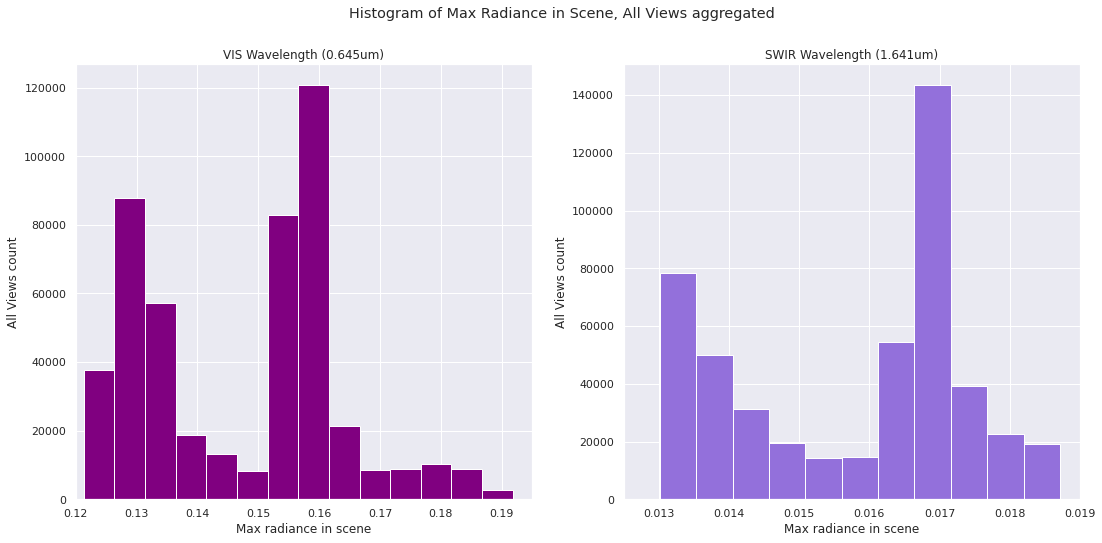

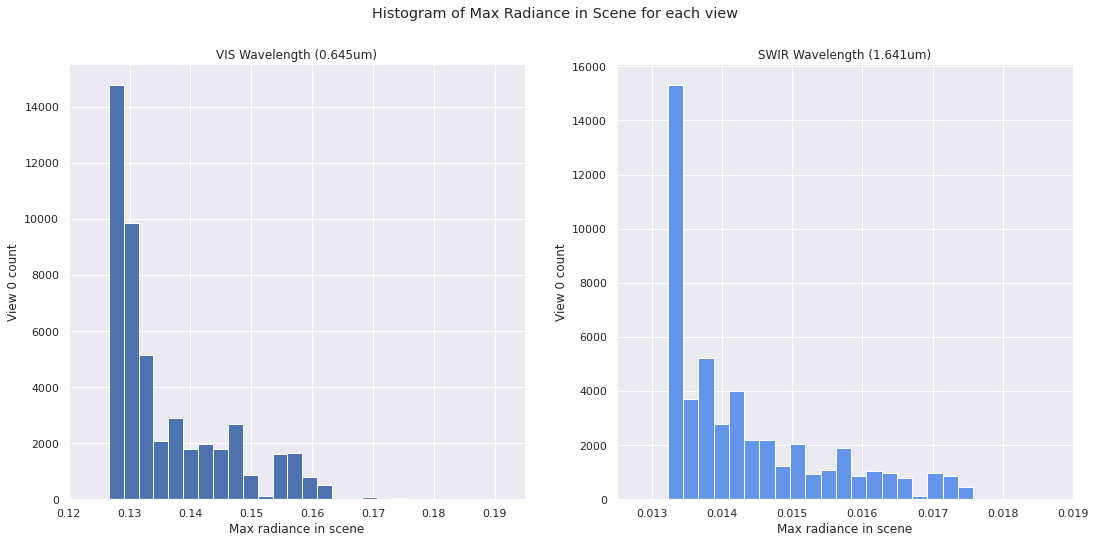

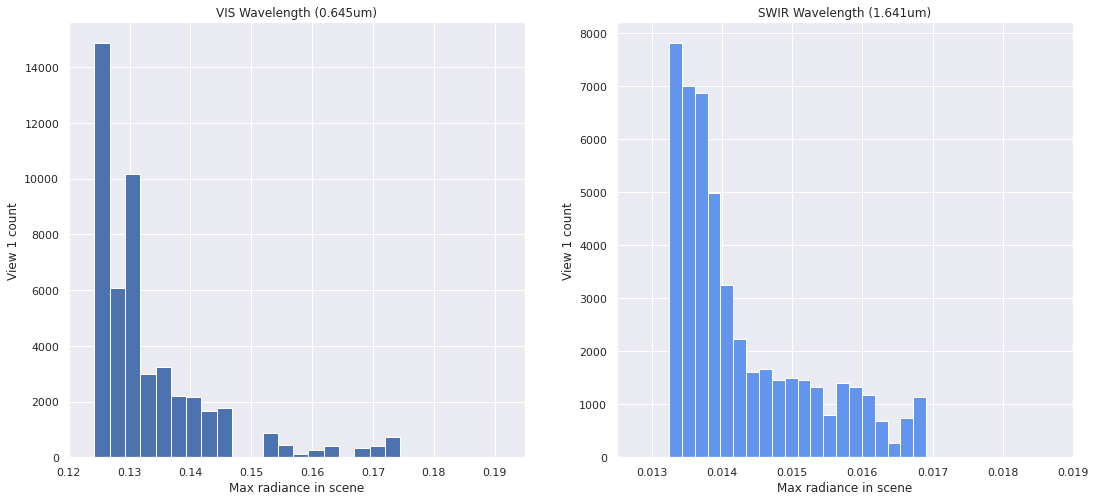

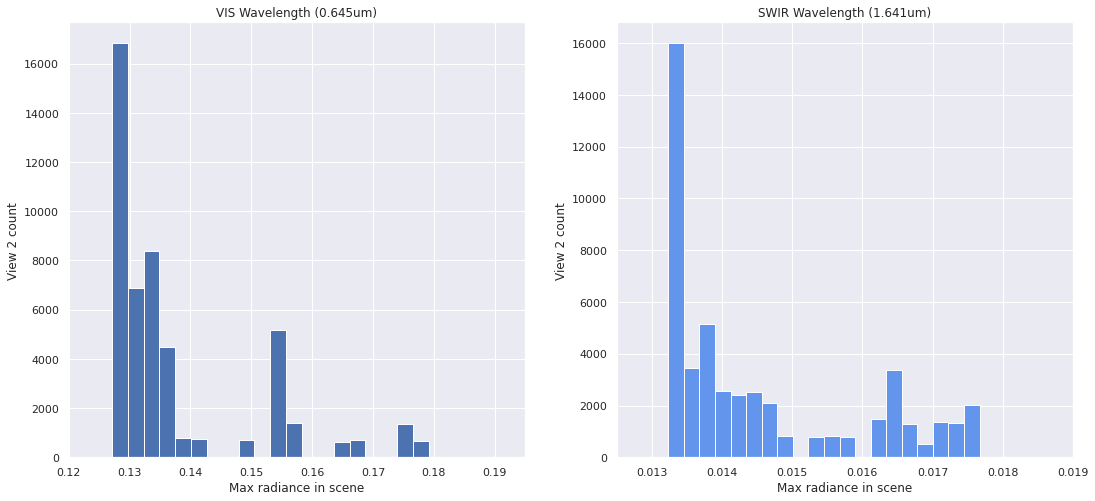

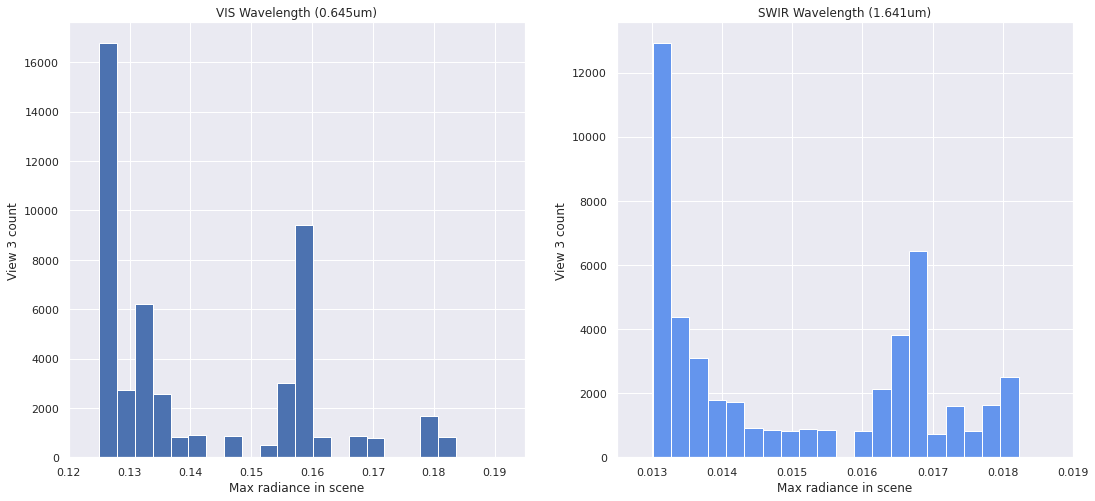

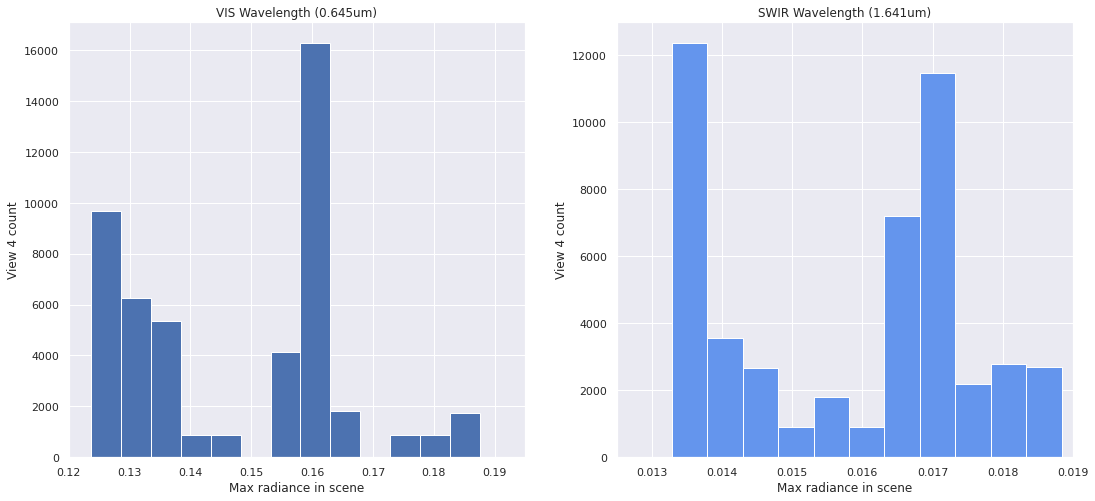

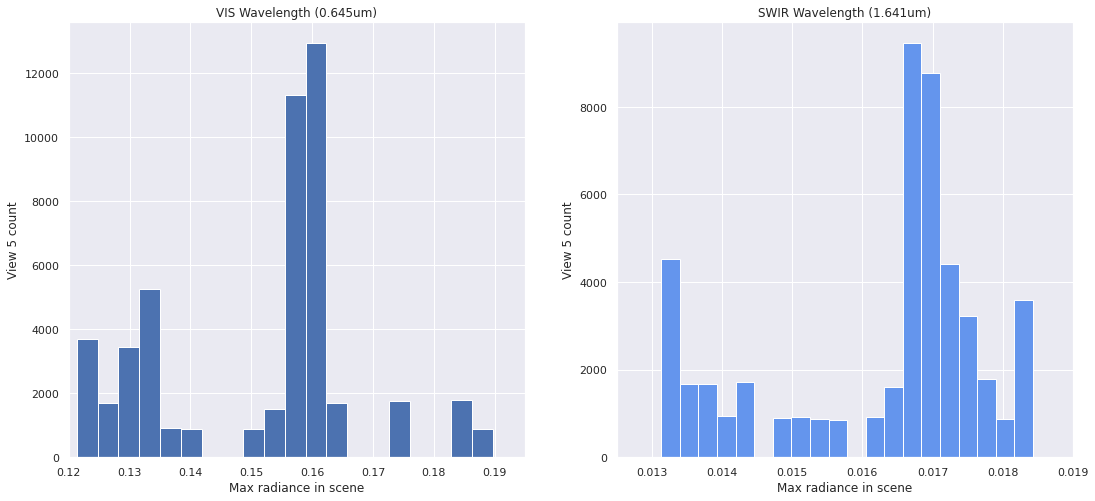

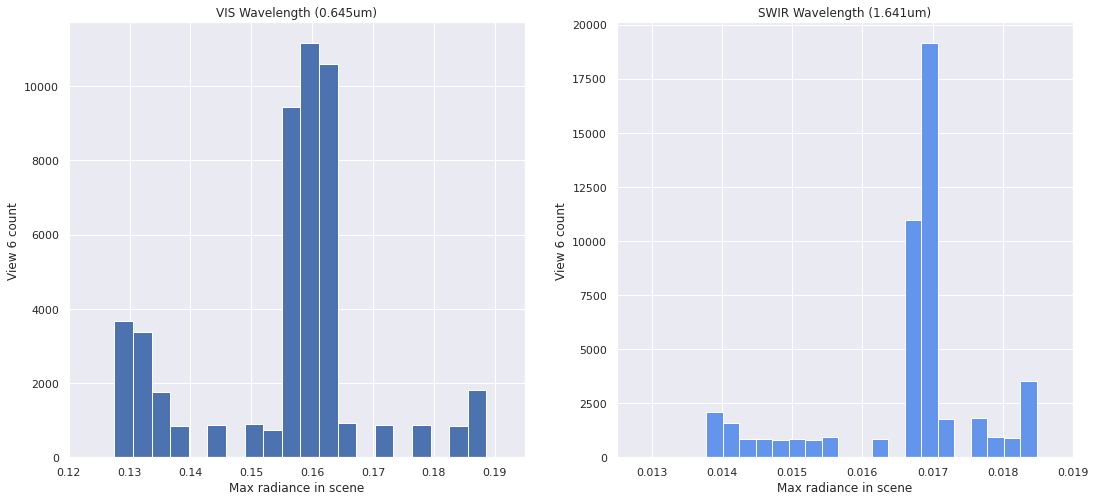

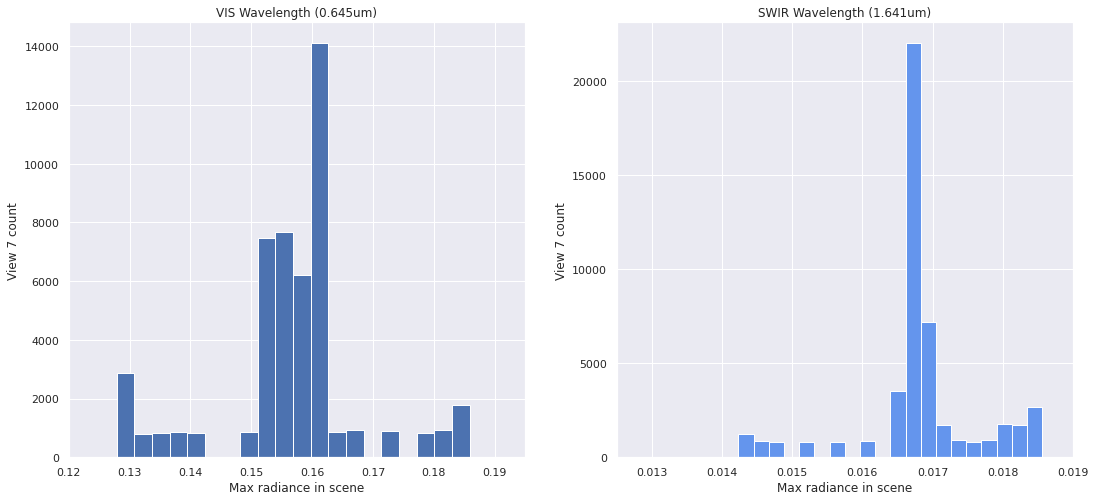

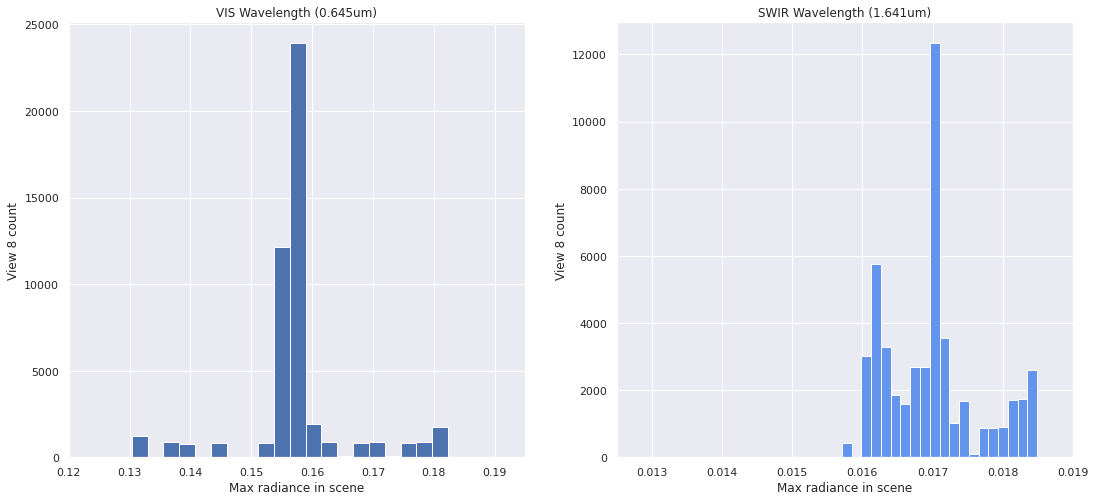

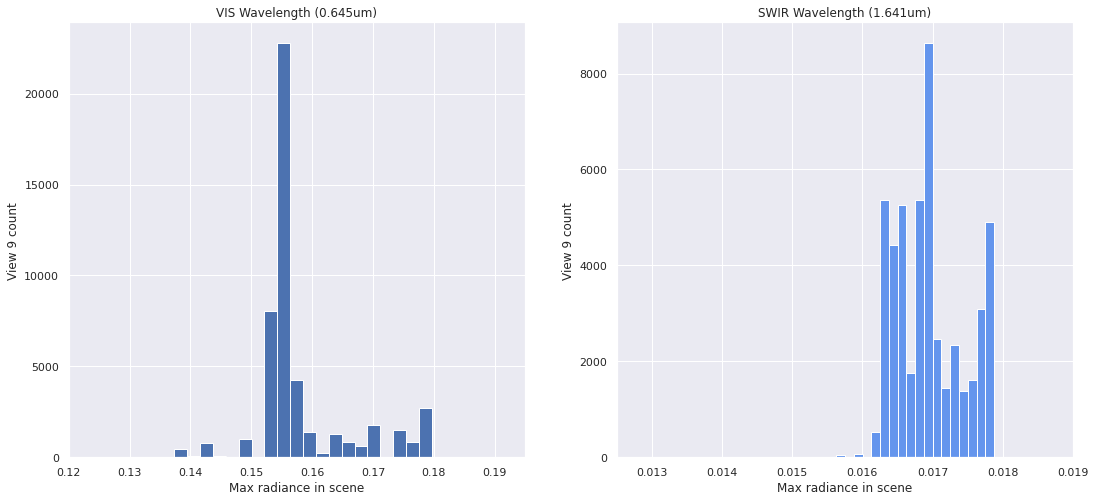

In [63]:
for index in range(10):
    
    if index == 0:
        
        ### All views same histogram different colors
#         fig2, axs2 = plt.subplots(1,2, figsize=(18,8))
        
#         fig2.suptitle("Histogram of Max Radiance in Scene, bar for each view")
        
#         axs2[0].set_title('VIS Wavelength (0.645um)')
#         axs2[1].set_title('SWIR Wavelength (1.641um)')

#         axs2[0].hist(vis_radiance_full, bins=10)
#         axs2[1].hist(swir_radiance_full, bins=10)
        
#         axs2[0].set_xlabel('Max radiance in scene')
#         axs2[1].set_xlabel('Max radiance in scene')
#         axs2[0].set_xlim(0.12,0.19)
#         axs2[1].set_xlim(0.013,0.019)

#         axs2[0].set_ylabel(f'Count')
#         axs2[1].set_ylabel(f'count')
        
        
        ### All views together
        fig3, axs3 = plt.subplots(1,2, figsize=(18,8))
        
        fig3.suptitle("Histogram of Max Radiance in Scene, All Views aggregated")
        
        axs3[0].set_title('VIS Wavelength (0.645um)')
        axs3[1].set_title('SWIR Wavelength (1.641um)')

        axs3[0].hist(vis_radiance_full.flatten(), bins=20, color='purple')
        axs3[1].hist(swir_radiance_full.flatten(), bins=20, color='mediumpurple')
        
        axs3[0].set_xlabel('Max radiance in scene')
        axs3[1].set_xlabel('Max radiance in scene')
        axs3[0].set_xlim(0.12,0.195)
        axs3[1].set_xlim(0.0125,0.019)

        axs3[0].set_ylabel(f'All Views count')
        axs3[1].set_ylabel(f'All Views count')
        

        
        
    fig, axs = plt.subplots(1,2, figsize=(18,8))
    if index == 0:
        fig.suptitle("Histogram of Max Radiance in Scene for each view")

    axs[0].set_title('VIS Wavelength (0.645um)')
    axs[1].set_title('SWIR Wavelength (1.641um)')

    axs[0].hist(vis_radiance_full[:,index], bins=20)
    axs[1].hist(swir_radiance_full[:,index], bins=20,color='cornflowerblue')
    axs[0].set_xlabel('Max radiance in scene')
    axs[1].set_xlabel('Max radiance in scene')
    axs[0].set_xlim(0.12,0.195)
    axs[1].set_xlim(0.0125,0.019)

    axs[0].set_ylabel(f'View {index} count')
    axs[1].set_ylabel(f'View {index} count')
